# Terms of use and license


<span style="color: Lavender;">This notebook shows how to run inference on the Sea-Land-Cloud-Labeled dataset from HYPSO-1. Inference is run using an existing trained model file for illustration purposes.</span>

<small><span style="color: Lavender;">Users within the open community are fully permitted and encouraged to access, download, analyze, and use our data, ground-truth labels, models, and their software codes as long as proper credit is given to the authors in the citations below. The present material is released under the Attribution 4.0 International (CC BY 4.0) license.

© 2023 Norwegian University of Science and Technology (NTNU) in Trondheim, Norway. All rights reserved.</span></small>

  - <span style="color: Lavender;"><em> by Jon Alvarez Justo, Joseph Landon Garrett, Mariana-Iuliana Georgescu, Jesus Gonzalez-Llorente, Radu Tudor Ionescu, and Tor Arne Johansen</em></span>.


**Models citation (BibTeX)**

<small>

  @article{justo2023sea,

  title={Sea-Land-Cloud Segmentation in Satellite Hyperspectral Imagery by Deep Learning},

  author={Justo, Jon Alvarez and Garrett, Joseph Landon and Georgescu, Mariana-Iuliana and Gonzalez-Llorente, Jesus and Ionescu, Radu Tudor and Johansen, Tor Arne},

  journal={arXiv preprint arXiv:2310.16210},

  year={2023}

}

Article at https://arxiv.org/abs/2310.16210 - check at the end of the paper the link to download the full supplementary materials including software codes.

</small>


**Dataset citation (BibTeX)**
<small>

  @article{justo2023open,

  title={An Open Hyperspectral Dataset with Sea-Land-Cloud Ground-Truth from the HYPSO-1 Satellite},
  
  author={Justo, Jon A and Garrett, Joseph and Langer, Dennis D and Henriksen, Marie B and Ionescu, Radu T and Johansen, Tor A},

  journal={arXiv preprint arXiv:2308.13679},

  year={2023}

}

Article at https://arxiv.org/abs/2308.13679 - download dataset from https://ntnu-smallsat-lab.github.io/hypso1_sea_land_clouds_dataset.

</small>



****************************************************************


# Import Packages
Make sure to have installed the packages (in next cell) in your Python version; for instance: <em>pip3 install numpy</em>

In [3]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py310_4.12.0-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py310" --user

--2025-01-22 16:26:39--  https://repo.anaconda.com/miniconda/Miniconda3-py310_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83174251 (79M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  79.32M  74.1MB/s    in 1.1s    

2025-01-22 16:26:41 (74.1 MB/s) - ‘mini.sh’ saved [83174251/83174251]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py310h7f8727e_1002
    - bzip2==1.0.8=h7b6447c_0
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.5.30=py310h06a4308_0
    - cffi==1.15.0=py310hd667e15_1
    - charset-normalizer==2.0.4

In [4]:
!python --version
!pip install tensorflow==2.8.0

Python 3.10.16
     |████████████████████████████████| 497.6 MB 5.6 kB/s 
     |████████████████████████████████| 5.3 MB 46.6 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 82 kB 974 kB/s 
     |████████████████████████████████| 319 kB 52.8 MB/s 
     |████████████████████████████████| 1.4 MB 53.5 MB/s 
     |████████████████████████████████| 24.5 MB 1.2 MB/s 
     |████████████████████████████████| 5.1 MB 47.4 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 275 kB/s 
     |████████████████████████████████| 6.0 MB 50.0 MB/s 
     |████████████████████████████████| 5.8 MB 26.7 MB/s 
     |████████████████████████████████| 462 kB 57.5 MB/s 
     |████████████████████████████████| 133 kB 50.7 MB/s 
     |████████████████████████████████| 224 kB 63.9 MB/s 
     |████████████████████████████████| 4.9 MB 49.5 MB/s 
     |████████████████████████████████| 781 kB 55.8 MB/s 
     |

In [6]:
!pwd
!ls

/content
mini.sh  sample_data


In [2]:
!pip install matplotlib
!pip install patchify

In [11]:
import os
os.environ['PATH'] = "/usr/local/bin:" + os.environ['PATH']

In [28]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [29]:
import sys
print("Kernel Python executable:", sys.executable)  # Kernel's Python
!which python  # Shell's default Python
!which python3  # Shell's Python3
!ls -l /usr/bin/python3  # Check the symlink for /usr/bin/python3

Kernel Python executable: /usr/bin/python3
/usr/local/bin/python
/usr/local/bin/python3
lrwxrwxrwx 1 root root 25 Jan 17 14:22 /usr/bin/python3 -> /etc/alternatives/python3


In [30]:
import sys
print(sys.executable)
!/usr/bin/python3 --version
!python --version

/usr/bin/python3
Python 3.10.12
Python 3.10.16


In [35]:
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages')
print("\n".join(sys.path))

/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/usr/local/lib/python3.11/dist-packages/setuptools/_vendor
/root/.ipython
/usr/local/lib/python3.10/site-packages


In [33]:
!pip show patchify
!pip show tensorflow

Name: patchify
Version: 0.2.3
Summary: A library that helps you split image into small, overlappable patches, and merge patches back into the original image.
Home-page: https://github.com/dovahcrow/patchify.py
Author: Weiyuan Wu
Author-email: doomsplayer@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/site-packages
Requires: numpy
Required-by: 
Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/site-packages
Requires: h5py, grpcio, tf-estimator-nightly, six, flatbuffers, numpy, setuptools, keras-preprocessing, gast, tensorflow-io-gcs-filesystem, google-pasta, wrapt, tensorboard, keras, opt-einsum, typing-extensions, astunparse, libclang, protobuf, termcolor, absl-py
Required-by: 


In [36]:
from tensorflow.keras.models import load_model
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import patchify

# Local imports
from utils_for_data_handling import *
utils_o=utils_for_data_handling() # Create object of local class

Utils object instanced!


# Path to Image Files
We run inference on 30 different Hyperspectral Images (L1b calibrated radiance) for testing the models' generalisation.
To find the images according to their respective IDs, we refer you to our website:
           https://ntnu-smallsat-lab.github.io/hypso1_sea_land_clouds_dataset
. For this current notebook, we use images with the following IDs:

    8, 22, 23, 33, 55, 66, 75, 78, 87, 88, 91, 92, 117, 122, 135, 138, 144, 145, 147, 149, 176, 181, 186, 208, 212, 262, 268, 272, 274, 275

Important: make sure to specify next the local path in your PC where you have stored the images.

In [37]:

### --> FOR USER: Enter next the local path where you have stored the images. Make sure to finish the path by /
DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED='./data/' # Example path


PATHS_TO_DATA=[] # Empty list for paths
# The images below are directly accessible for download in the supplementary material of our article: "Sea-Land-Cloud Segmentation in Satellite Hyperspectral Imagery by Deep Learning"
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '8-20220911_CaptureDL_00_haida_2022_09_11T19_24_10-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '22-20221118_CaptureDL_sanrafael_2022_11_16T14_13_57-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '23-20221011_CaptureDL_rrvPlaya_2022_10_10T18_22_33-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '33-20221215_CaptureDL_maunaloa_2022_12_02T20_03_26-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '55-20221209_CaptureDL_bohai_2022_12_07T03_02_01-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '66-20221203_CaptureDL_falklands_2022_12_02T12_27_05-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '75-20221130_CaptureDL_vancouver_2022_11_27T19_22_56-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '78-20221130_CaptureDL_florida_2022_11_25T15_10_03-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '87-20221126_CaptureDL_tenerife_2022_11_21T11_15_03-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '88-20221126_CaptureDL_qatar_2022_11_20T06_42_58-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '91-20221126_CaptureDL_jiaozhouBayBridge_2022_11_20T01_54_58-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '92-20221126_CaptureDL_trondheim_2022_11_19T09_56_00-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '117-20221023_CaptureDL_gulfOfAqaba_07_49_08-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '122-20221020_CaptureDL_gobabeb_2022_10_20T08_39_51-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '135-20221010_CaptureDL_patra_2022_10_10T08_51_44-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '138-20221010_CaptureDL_tampa_target_l_2022_10_07T15_51_50-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '144-20220928_CaptureDL_00_belem_2022_09_28T13_03_32-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '145-20220927_CaptureDL_00_finnmark_71.1958_26.1931_2022_09_27T09_45_45-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '147-20220925_CaptureDL_00_santarem_2022_09_25T13_40_04-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '149-20220923_CaptureDL_00_lisbon_2022_09_23T10_43_19-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '176-20220908_CaptureDL_00_fagradalsfjall_2022_09_08T12_01_47-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '181-20220905_CaptureDL_00_eerie_t_r_2022_09_05T15_53_52-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '186-20220829_CaptureDL_00_runde_2022_08_29T10_50_39-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '208-20220806_CaptureDL_00_vancouverisland_2022_08_06T18_37_57-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '212-20220805_CaptureDL_00_balaton_2022_08_05T09_18_56-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '262-20220630_CaptureDL_00_grieg_T1929-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '268-20220621_Capture_DL_00_mjosa_T10_05-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '272-20220610_CaptureDL_00_Lofoten_10_34-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '274-20230215_CaptureDL_yangon_2023-02-15_0330Z-radiance.npy')
PATHS_TO_DATA.append(DIRECTORY_WHERE_DATA_FOR_INFERENCE_IS_STORED + '275-20230313_CaptureDL_chapala_2023-02-19_1649Z_2-radiance.npy')


NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET=len(PATHS_TO_DATA)
print('Number of paths to images: ', NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET)

Number of paths to images:  30


# Path to Segmentation Model
Define next the local path where the trained model file is located in your PC.

In [ ]:

DATA_PROCESSING_MODE='1D_PROCESSING' # Choose: '1D_PROCESSING', or '3D_PROCESSING'

if DATA_PROCESSING_MODE=='1D_PROCESSING':
        # As an example, we use the model 'DEEP_LEARNING_NN_classifier_20231009_203324'
        #   The model file corrsponds to 1D-Justo-LiuNet trained on L1b calibrated radiance for 112 channels
        #   (NB: Instead of using the 120 channels in the dataset, we exclude channels 0, 1, 2, 3, 106, 107, 108, 109
        #           - details provided in the article referenced at the start of this Python notebook)

                # Example path - models available in supplementary material of article cited at the start of this notebook
        PATH_TO_MODEL='C:/Users/JONAJUSTO/Desktop/SAVED_MODELS_SEALANDCLOUD_SEGM/MAIN_MODEL_EXPERIMENTS/DEEP LEARNING MODELS/DEEP_LEARNING_NN_classifier_20231009_203324'

        # Note: When testing different models, make sure to feed the models with data of the same characteristics as in the training, as explained next.
        #            For instance, if a model has been trained on L1b radiance, then the data during inference must also be L1b radiance - likewise for unprocessed raw data.
        #            In the pre-processing stages, we remove certain channels. Make sure to pick the 'right' channels to remove, as illustrated next.
        #            For instance, if a model has been trained with 112 channels, then it must receive during inference 112 channels and not 3 for example.

elif DATA_PROCESSING_MODE=='3D_PROCESSING':
        # As an example, we use the model 'DEEP_LEARNING_NN_classifier_20231009_140540'
        #   The model file corrsponds to 2D-CUNet++ Reduced trained on L1b calibrated radiance for patch size 48 x 48 and 112 channels
        #   (NB: Instead of using the 120 channels in the dataset, we exclude channels 0, 1, 2, 3, 106, 107, 108, 109
        #           - details provided in the article referenced at the start of this Python notebook)

                # Example path - models available in supplementary material of article cited at the start of this notebook
        PATH_TO_MODEL='C:/Users/JONAJUSTO/Desktop/SAVED_MODELS_SEALANDCLOUD_SEGM/MAIN_MODEL_EXPERIMENTS/DEEP LEARNING MODELS/DEEP_LEARNING_NN_classifier_20231009_140540'



print('Loading model...')
model_classifier=load_model(PATH_TO_MODEL)
print('Model loaded ok! See architectural details next. \n')
model_classifier.summary()

Loading model...
Model loaded ok! See architectural details next. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 8)         8072      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 8)        0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 24, 24, 16)       216       
 Conv2D)                                                         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 24, 24, 16)      

# Load Image Files

In [ ]:
LINES=956; SAMPLES=684; CHANNELS=120 # Lines (frames), slit samples (swath), and channels are set to default values for HYPSO-1
DATA=-1 * np.ones((NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, LINES, SAMPLES, CHANNELS), dtype=np.float32) # Radiance is float32 (4 bytes are enough)

print('Loading data...')
for iterator_images in range(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET):
    DATA[iterator_images, :, :, :]=np.load(PATHS_TO_DATA[iterator_images])

print('Loaded! The data is loaded in an array of dimensions: ', DATA.shape)


Loading data...
Loaded! The data is loaded in an array of dimensions:  (30, 956, 684, 120)


# Display Image
Display next an image (one channel) as an example.

The channel from the image has dimensions:  (956, 684) . Visualisation below (gray scale).


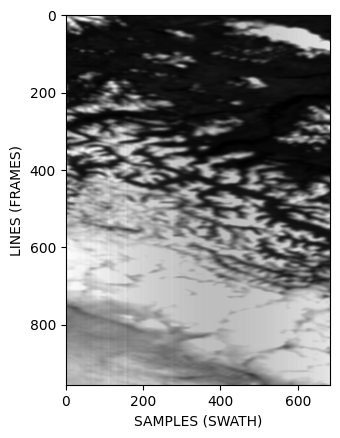

In [ ]:
# Choose one image in the array DATA. As an example, we pick next channel 89 which corresponds to the visible red (699.61 nm) in L1b calibration
IMAGE=25; CHANNEL=89

CHANNEL_GRAY_SCALE=DATA[IMAGE, :, :, [CHANNEL]]             # Result has dimensions: 1 x 956 x684
CHANNEL_GRAY_SCALE=np.squeeze(CHANNEL_GRAY_SCALE, axis=0)   # Result has dimensions: 956 x684 (remove first dimension)


print('The channel from the image has dimensions: ', CHANNEL_GRAY_SCALE.shape, '. Visualisation below (gray scale).')
plt.imshow( CHANNEL_GRAY_SCALE / CHANNEL_GRAY_SCALE.max() , cmap='gray') # Normalize the image
plt.xlabel('SAMPLES (SWATH)')
plt.ylabel('LINES (FRAMES)');


# Pre-processing (I): Channel Reduction and Normalization
We remove next a few channels from the dataset and conduct Min-Max normalization

Make sure to run the following cell only once.

In [ ]:
CHANNELS_TO_REMOVE=[0, 1, 2, 3, 106, 107, 108, 109]
                # In this notebook, we employ 112 out of the 120 channels of the dataset. Further reasons in our article
                # referenced at the start of this notebook.
                # NB: The channel numbers refer to L1b calibration.

print('Dimensions of data before removing channels: ', DATA.shape)
print('Removing channels...')
DATA=np.delete(DATA, CHANNELS_TO_REMOVE, axis=-1)  # Remove in last axis (channels dimension)
print('Completed. Dimensions of data after removing channels: ', DATA.shape)


# Normalize the complete dataset at once
MINIMUM_OF_DATA=np.min(DATA)
MAXIMUM_OF_DATA=np.max(DATA)

print('Minimum of the data before normalization: ', MINIMUM_OF_DATA)
print('Maximum of the data before normalization: ', MAXIMUM_OF_DATA)
DATA=(DATA-MINIMUM_OF_DATA)/(MAXIMUM_OF_DATA-MINIMUM_OF_DATA) # Min-Max normalization
print('Normalized!')

MINIMUM_OF_DATA=np.min(DATA)
MAXIMUM_OF_DATA=np.max(DATA)
print('Minimum of the data after normalization: ', MINIMUM_OF_DATA)
print('Maximum of the data after normalization: ', MAXIMUM_OF_DATA)

Dimensions of data before removing channels:  (30, 956, 684, 120)
Removing channels...
Completed. Dimensions of data after removing channels:  (30, 956, 684, 112)
Minimum of the data before normalization:  -0.06433178
Maximum of the data before normalization:  373.69455
Normalized!
Minimum of the data after normalization:  0.0
Maximum of the data after normalization:  1.0


# Pre-processing (II): Data Arangement prior to Model Inference
Arange the dimensions of the data before feeding it to the segmentation model.


In [ ]:


if DATA_PROCESSING_MODE=='1D_PROCESSING':
    print('Before dimension arangement: ', DATA.shape)
    DATA_FLATTENED=DATA.reshape(DATA.shape[0]*DATA.shape[1]*DATA.shape[2] , DATA.shape[3]) # Dimensions: PIXELS x CHANNELS
    print('After dimension arangement: ', DATA_FLATTENED.shape)
    # DATA_FLATTENED will be passed to the model




elif DATA_PROCESSING_MODE=='3D_PROCESSING':
    # Necessary to patch the images first, as follows:
    #   1) Padd the images' borders
    #   2) Patch the images

    print('DATA before padding has dimensions: ', DATA.shape)


    print('Padding images...')
    # VERY IMPORTANT! Do not modify the call to the next method for padding the data unless aware of the effects
    # of introducing changes. The call is already fixed to work under the 3D-Processing scenario.
    PATCH_SIZE=48
    DATA_PADDED, DUMMY_LABELS_PADDED, \
    NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED, NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED=\
            utils_o.cropping_or_padding_of_spatial_resolution(
                                            DATA_POINTS_PROCESSING_MODE_DURING_INFERENCE='3D-PROCESSING',\
                                            ENABLE_SHOULD_PAD=True,\
                                            DATA=DATA,\
                                            LABELS= -1 * np.ones((DATA.shape[0], DATA.shape[1], DATA.shape[2])),\
                                            PATCH_SIZE=PATCH_SIZE, \
                                            PADDING_TECHNIQUE='CONSTANT_PADDING_EXTENDING_EDGES')
                            # Note: LABELS are just some dummy labels as the deployment set does not have any ground-truth labels.
                            # Dimensions for DATA: IMAGES x LINES x SAMPLES x CHANNELS
                            # Dimensions for LABELS: IMAGES x LINES x SAMPLES (categorical)
                            # Resulting outputs from the method:
                            #   DATA has the same number of images and channels, yet the lines and samples have been padded
                            #   DUMMY_LABELS: not relevant for this notebook

    print('Padding completed!...')


    LINES_AFTER_PADDING=DATA_PADDED.shape[1]
    SAMPLES_AFTER_PADDING=DATA_PADDED.shape[2]

    print('Number of lines after padding: ', LINES_AFTER_PADDING)
    print('Number of samples after padding: ', SAMPLES_AFTER_PADDING)
    print('DATA after padding has dimensions: ', DATA_PADDED.shape)


    # At this point, the following parameters are important for patching:
    #   PATCH_SIZE, NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED, NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED



    # Before patching, we first need to ensure that PATCH_SIZE, NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED, and
    # NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED are integer in order to create the dimensions of the arrays that will contain
    # the patched data.
    PATCH_SIZE=int(PATCH_SIZE)
    NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED=int(NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED)
    NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED=int(NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED)

    # We now patch the data next
    print('Patching the data...')




    DATA_PATCHED, DUMMY_LABELS_PATCHED=\
        utils_o.patch_data_and_annotations(
                                            DATA=DATA_PADDED,\
                                            ANNOTATIONS=DUMMY_LABELS_PADDED,\
                                            PATCH_SIZE=PATCH_SIZE,\
                                            NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED=NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED,\
                                            NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED=NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED
                                            )

                    # DATA_PADDED is in 4D: IMAGES x LINES x SAMPLES x CHANNELS - yet LINES and SAMPLES have been padded
                    # DUMMY_LABELS_PADDED: not relevant
                    # The resulting output would be:
                    # DATA_PATCHED has dimensions:
                    #   IMAGES x NUMBER_OF_PATCHES_IN_LINES_DIRECTION x NUMBER_OF_PATCHES_IN_SAMPLES_DIRECTION x
                    #           x PATCH_SIZE x PATCH_SIZE x CHANNELS
                    # DUMMY_LABELS_PATCHED: not relevant
    print('Patching completed!')


    # Now flatten the patches as the models (2D-CNNs) will take input: NUMBER_OF_PATCHES x PATCH_SIZE x PATCH_SIZE x CHANNELS


    print('Data before flattening patches: ', DATA_PATCHED.shape, ', and dtype: ', DATA_PATCHED.dtype)
    DATA_FLATTENED=\
        DATA_PATCHED.reshape(DATA_PATCHED.shape[0]*DATA_PATCHED.shape[1]*DATA_PATCHED.shape[2],\
                             PATCH_SIZE, PATCH_SIZE, DATA_PATCHED.shape[5])
                # DATA_PATCHED has dimensions:
                #   IMAGES x NUMBER_OF_PATCHES_IN_LINES_DIRECTION x NUMBER_OF_PATCHES_IN_SAMPLES_DIRECTION x
                #           x PATCH_SIZE x PATCH_SIZE x CHANNELS
                # The resulting output of the method is DATA_FLATTENED with dimensions:
                #    NUMBER_OF_PATCHES x PATCH_SIZE x PATCH_SIZE x CHANNELS
    print('Data after flattening patches: ', DATA_FLATTENED.shape, ', and dtype: ', DATA_FLATTENED.dtype)

    # Note: no need to flatten the patches for the labels as they are mere dummy annotations used previously to be able to call the methods for
    #       padding and patching (these methods expect to receive both data and labels at the same time).




DATA before padding has dimensions:  (30, 956, 684, 112)
Padding images...
The segmentation mode is:  3D-PROCESSING . Before patching the images and labels, the spatial dimensions will be padded (not cropped) as the flag for padding is set to:  True
The samples dimension does not give an integer number of patches. Number of samples:  684 , patch_size:  48
The lines dimension does not give an integer number of patches. Number of lines:  956 , patch_size:  48
Number of samples after padding adjustment will be:  720.0
Number of patches in samples dimension (adjusted) will be:  15.0
Number of samples to padd will be:  36
Number of lines after padding adjustment will be:  960.0
Number of patches in lines dimension (adjusted) will be:  20.0
Number of lines to pad will be:  4
DATA before CROPPING OR PADDING:  (30, 956, 684, 112) , and dtype:  float32
ANNOTATIONS before CROPPING OR PADDING:  (30, 956, 684) , and dtype:  float64
DATA AFTER CROPPING OR PADDING:  (30, 960, 720, 112) , and dtype: 

# Segmentation Inference

In [ ]:
print('Tip: make sure GPU is enabled next for faster inference.\n')
print('Accessible devices by Tensorflow (check if any GPU is in the list):\n ', tf.config.list_physical_devices())
print('\nSegmentation inference running (it may take some time depending on the model, GPU, and number of images to segment)...')

print('Number of images to segment: ', NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET,\
      '\nFor instance, if each image takes for instance 15s (as in 1D-Justo-LiuNet), then the segmentation of e.g. 30 images would take over 7 minutes.')
print('\nReminder of results: for 3D-Processing inferece time is significantly smaller')
STARTING_TIME = time.time()
PREDICTION=model_classifier.predict(DATA_FLATTENED)
FINISH_TIME = time.time()

print('Inference completed!')
INFERENCE_TIME=FINISH_TIME-STARTING_TIME
print(f'Inference time to segment the image: {round(INFERENCE_TIME, 2)} seconds.')

Tip: make sure GPU is enabled for faster inference.

Accessible devices by Tensorflow (check if any GPU is in the list):
  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Segmentation inference running (it may take some time depending on the model, GPU, and number of images to segment)...
Number of images to segment:  30 
For instance, if each image takes for instance 15s (as in 1D-Justo-LiuNet), then the segmentation of e.g. 30 images would take over 7 minutes.

Reminder of results: for 3D-Processing inferece time is significantly smaller
Inference completed!
Inference time to segment the image: 8.69 seconds.


# Post-processing (I): Categorical Predictions and Model Confidence
The next cells assume the segmentation model has produced probabilities during inference, as it is often the case with deep learning models using softmax in the output classification layer. For each image pixel, from its predicted probability distribution, we take the class with the highest probability, and consequently infer the categorical pixel prediction.

Note: If the machine learning models were of interest to be tested (instead of the deep learning models), then we remind that the machine learning models often produce directly the categorical pixel predictions, rather than probability distributions.

In [ ]:

print('Predictions from inference have dimensions: ', PREDICTION.shape, ', and dtype: ', PREDICTION.dtype)
PREDICTED_PROBABILITY=np.max(PREDICTION, axis= -1)  # Largest probability, referred henceforth as 'confidence probability', which
                                                    # determines the degree of confidence of the model when making a prediction for a pixel
PREDICTED_CATEGORICAL_CLASS=np.uint8(np.argmax(PREDICTION, axis= -1))   # The final categorical prediction


print('Dimensions when computing ONLY the categorical prediction for each pixel: ', PREDICTED_CATEGORICAL_CLASS.shape, ', and dtype: ', PREDICTED_CATEGORICAL_CLASS.dtype)
print('Dimensions for the confidence probabilities: ', PREDICTED_PROBABILITY.shape, ', and dtype: ', PREDICTED_PROBABILITY.dtype)


Predictions from inference have dimensions:  (9000, 48, 48, 3) , and dtype:  float32
Dimensions when computing ONLY the categorical prediction for each pixel:  (9000, 48, 48) , and dtype:  uint8
Dimensions for the confidence probabilities:  (9000, 48, 48) , and dtype:  float32


# Post-processing (II): Dimension Arangement of Model Results
We unflatten the segmented results back to: IMAGES x LINES x SAMPLES.

We perform this operation for each segmented image (categorical) as well as the respective confidence probabilities.

In [ ]:

# At this point, arange dimensions for PREDICTED_CATEGORICAL_CLASS and PREDICTED_PROBABILITY
if DATA_PROCESSING_MODE=='1D_PROCESSING':
    print('Unflattening data points...')
    PREDICTED_CATEGORICAL_CLASS=PREDICTED_CATEGORICAL_CLASS.reshape(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, LINES, SAMPLES)
    PREDICTED_PROBABILITY=PREDICTED_PROBABILITY.reshape(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, LINES, SAMPLES)

    print('UNFLATTENED OK - Dimensions for segmented dataset (categorical): ', PREDICTED_CATEGORICAL_CLASS.shape, ', and dtype: ', PREDICTED_CATEGORICAL_CLASS.dtype)
    print('UNFLATTENED OK - Dimensions for the confidence probabilities for the segmented dataset: ', PREDICTED_PROBABILITY.shape, ', and dtype: ', PREDICTED_PROBABILITY.dtype)

elif DATA_PROCESSING_MODE=='3D_PROCESSING':

    # Stage 1: Unflatten the patches
    print('Unflattening patches...')
    PREDICTED_CATEGORICAL_CLASS=\
        PREDICTED_CATEGORICAL_CLASS.reshape(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, \
                                            NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED, NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED, \
                                            PATCH_SIZE, PATCH_SIZE)
    PREDICTED_PROBABILITY=\
        PREDICTED_PROBABILITY.reshape(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, \
                                            NUMBER_OF_PATCHES_IN_LINES_DIMENSION_ADJUSTED, NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSION_ADJUSTED, \
                                            PATCH_SIZE, PATCH_SIZE)
            # We ensure to have the following dimensions:
            #   NUMBER_OF_IMAGES x NUMBER_OF_PATCHES_IN_LINES_DIMENSIONS x NUMBER_OF_PATCHES_IN_SAMPLES_DIMENSIONS x PATCH_SIZE x PATCH_SIZE

    print('UNFLATTENED patches (categorical) have now dimension: ', PREDICTED_CATEGORICAL_CLASS.shape, ', and dtype: ', PREDICTED_CATEGORICAL_CLASS.dtype)
    print('UNFLATTENED patches (confidence probability) have now dimension: ', PREDICTED_PROBABILITY.shape, ', and dtype: ', PREDICTED_PROBABILITY.dtype)


    # Stage 2: Unpatch
    print('\nThe unpatching next is for the categorical predictions:')
    PREDICTED_CATEGORICAL_CLASS=\
        utils_o.unpatch_predictions(PREDICTIONS_patched=PREDICTED_CATEGORICAL_CLASS,\
                                    TARGET_shape=(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, LINES_AFTER_PADDING, SAMPLES_AFTER_PADDING),\
                                    PATCH_SIZE=PATCH_SIZE)
    print('\nThe unpatching next is for the confidence probabilities:')
    PREDICTED_PROBABILITY=\
        utils_o.unpatch_predictions(PREDICTIONS_patched=PREDICTED_PROBABILITY,\
                                    TARGET_shape=(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET, LINES_AFTER_PADDING, SAMPLES_AFTER_PADDING),\
                                    PATCH_SIZE=PATCH_SIZE)



Unflattening patches...
UNFLATTENED patches (categorical) have now dimension:  (30, 20, 15, 48, 48) , and dtype:  uint8
UNFLATTENED patches (confidence probability) have now dimension:  (30, 20, 15, 48, 48) , and dtype:  float32

The unpatching next is for the categorical predictions:
Starting unpatching.....
Predictions before unpatching:  (30, 20, 15, 48, 48) , and dtype:  uint8
Predictions after unpatching::  (30, 960, 720) , and dtype:  uint8

The unpatching next is for the confidence probabilities:
Starting unpatching.....
Predictions before unpatching:  (30, 20, 15, 48, 48) , and dtype:  float32
Predictions after unpatching::  (30, 960, 720) , and dtype:  float32


# Method Definition

NB: There is no need to modify anything in the following method. It is defined here for subsequent call. The method visualises the models' results, i.e., categorical predictions (predicted segments) and confidence probabilities.

In [ ]:
def VISUALISE_SEGMENTATION_RESULTS(IMAGE, FONTSIZE, FIGURE_TITLE, FIGSIZE, CHANNEL,\
                                   DATA, SEGMENTED_IMAGE, CONFIDENCE_PROBABILITY_SPATIAL_DOMAIN, LINES, SAMPLES):



    NUMBER_OF_PIXELS_PREDICTED_AS_SEA=np.sum(SEGMENTED_IMAGE==0)
    NUMBER_OF_PIXELS_PREDICTED_AS_LAND=np.sum(SEGMENTED_IMAGE==1)
    NUMBER_OF_PIXELS_PREDICTED_AS_CLOUDS=np.sum(SEGMENTED_IMAGE==2)

    NUMBER_OF_PIXELS_IN_ONE_IMAGE=LINES*SAMPLES
    SEA_COVERAGE_LEVEL=NUMBER_OF_PIXELS_PREDICTED_AS_SEA/NUMBER_OF_PIXELS_IN_ONE_IMAGE
    LAND_COVERAGE_LEVEL=NUMBER_OF_PIXELS_PREDICTED_AS_LAND/NUMBER_OF_PIXELS_IN_ONE_IMAGE
    CLOUD_COVERAGE_LEVEL=NUMBER_OF_PIXELS_PREDICTED_AS_CLOUDS/NUMBER_OF_PIXELS_IN_ONE_IMAGE



    fig, axes=plt.subplots(1, 4, figsize=FIGSIZE)


    CHANNEL_GRAY_SCALE = DATA[IMAGE, :, :, [CHANNEL]]
    CHANNEL_GRAY_SCALE = np.squeeze(CHANNEL_GRAY_SCALE, axis=0)
    image_gray_scale=axes[0].imshow(CHANNEL_GRAY_SCALE, cmap='gray')
    axes[0].set_title('Gray-scale channel', fontsize=FONTSIZE, fontweight='bold')
    axes[0].set_xlabel('SAMPLES', fontsize=FONTSIZE)
    axes[0].set_ylabel('LINES', fontsize=FONTSIZE)


    colors_for_classes=['#0000C4', '#C47F00', '#6D6D6D'] # Color codes used when labeling the Sea-Land-Cloud-Labeled dataset from HYPSO-1
    cmap_for_classes=ListedColormap(colors_for_classes)

    segmented_image=axes[1].imshow(SEGMENTED_IMAGE, cmap=cmap_for_classes)
    axes[1].set_title('Segmented image', fontsize=FONTSIZE, fontweight='bold')
    axes[1].set_xlabel('SAMPLES', fontsize=FONTSIZE)
    axes[1].set_ylabel('LINES', fontsize=FONTSIZE)


    confindence_probability_distribution_fig = axes[2].imshow(CONFIDENCE_PROBABILITY_SPATIAL_DOMAIN, cmap='hot', interpolation='nearest')
    axes[2].set_title('Confidence probability', fontsize=FONTSIZE, fontweight='bold')
    axes[2].set_xlabel('SAMPLES', fontsize=FONTSIZE)
    axes[2].set_ylabel('LINES', fontsize=FONTSIZE)


    cbar0=fig.colorbar(image_gray_scale, ax=axes[0], orientation='horizontal', fraction=0.046, pad=0.15)

    cbar1=fig.colorbar(segmented_image, ax=axes[1], ticks=[0, 1, 2], orientation='horizontal', fraction=0.046, pad=0.15)
    tick_classes={0: 'Sea', 1: 'Land', 2: 'Cloud'}
    cbar1.set_ticklabels([tick_classes[a_tick] for a_tick in cbar1.get_ticks()])

    cbar2=fig.colorbar(confindence_probability_distribution_fig, ax=axes[2], orientation='horizontal', fraction=0.046, pad=0.15)


    for label in cbar0.ax.get_xticklabels():
        label.set_fontsize(FONTSIZE)

    for label in cbar1.ax.get_xticklabels():
        label.set_fontsize(FONTSIZE)

    for label in cbar2.ax.get_xticklabels():
        label.set_fontsize(FONTSIZE)



    coverage_distribution = [SEA_COVERAGE_LEVEL, LAND_COVERAGE_LEVEL, CLOUD_COVERAGE_LEVEL]
    CLASSES_NAMES=['Sea', 'Land', 'Clouds']
    axes[3].pie(coverage_distribution,\
                labels=CLASSES_NAMES, colors=colors_for_classes,
                autopct=lambda p: f'{p:.2f}%', textprops={'fontweight': 'bold', 'fontsize': FONTSIZE, 'color': 'white'},
                startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[3].axis('equal')


    for text in axes[3].texts:
        if text.get_text() in CLASSES_NAMES:
            text.set_color('black')

    plt.suptitle(FIGURE_TITLE, fontsize=FONTSIZE, fontweight='bold')
    plt.show()


# Visualise Segmented Images
We visualise next the segmentation results for all the images for which inference has been run.

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/8-20220911_CaptureDL_00_haida_2022_09_11T19_24_10-radiance.npy


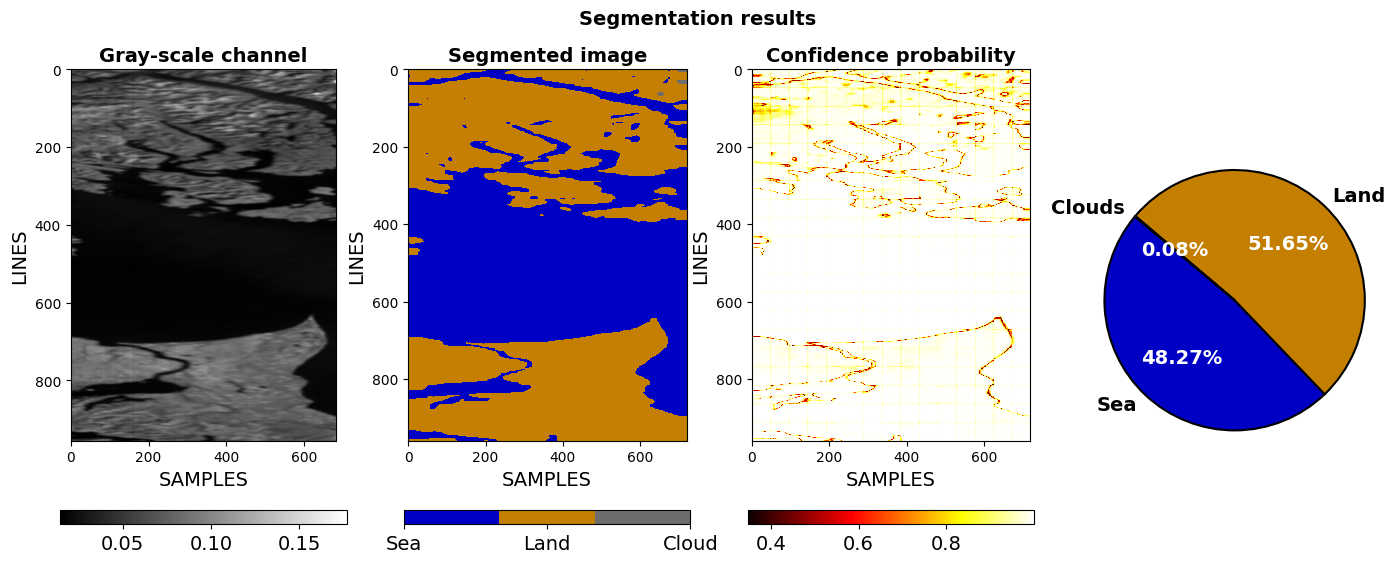

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/22-20221118_CaptureDL_sanrafael_2022_11_16T14_13_57-radiance.npy


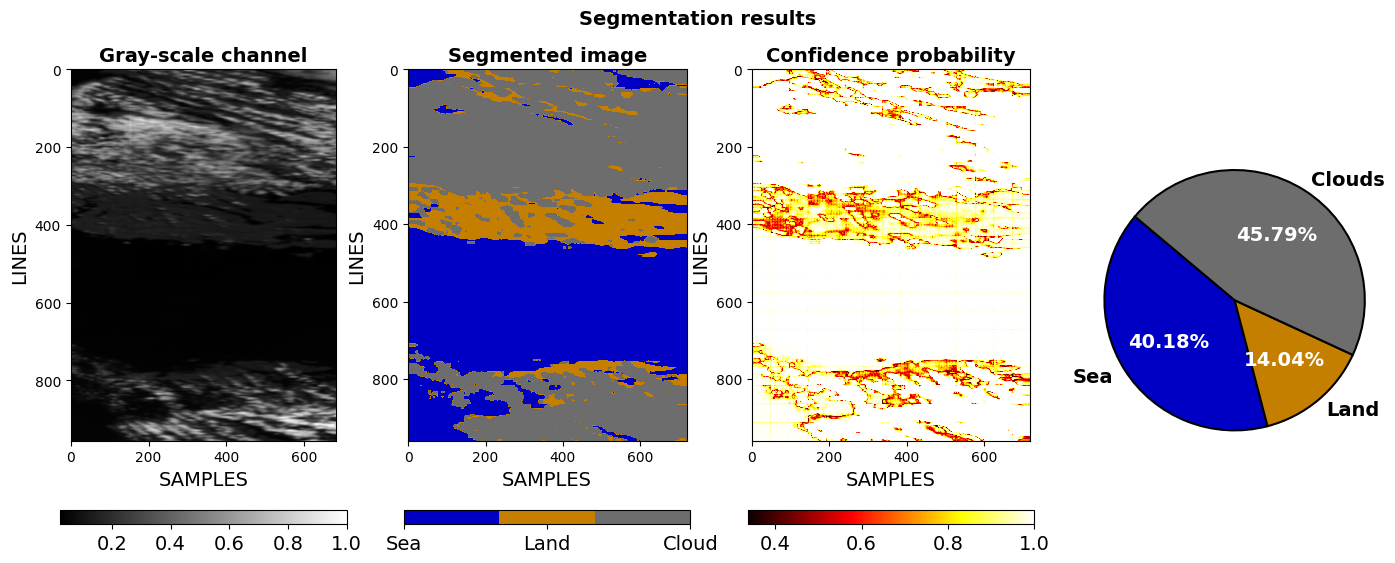

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/23-20221011_CaptureDL_rrvPlaya_2022_10_10T18_22_33-radiance.npy


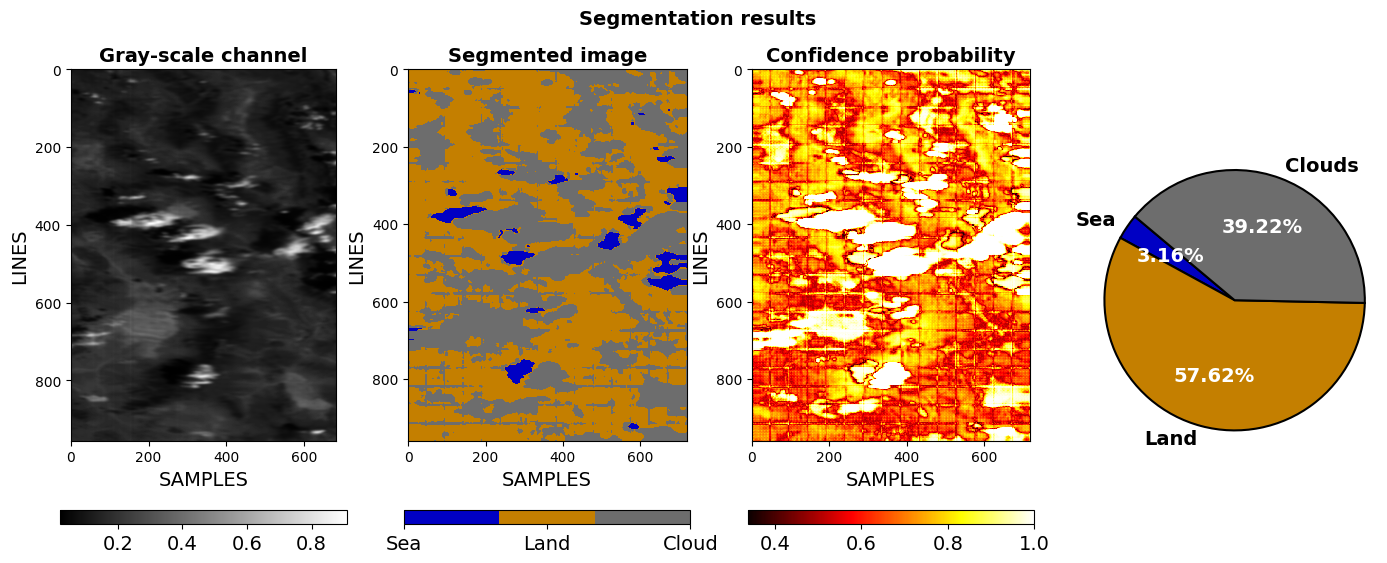

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/33-20221215_CaptureDL_maunaloa_2022_12_02T20_03_26-radiance.npy


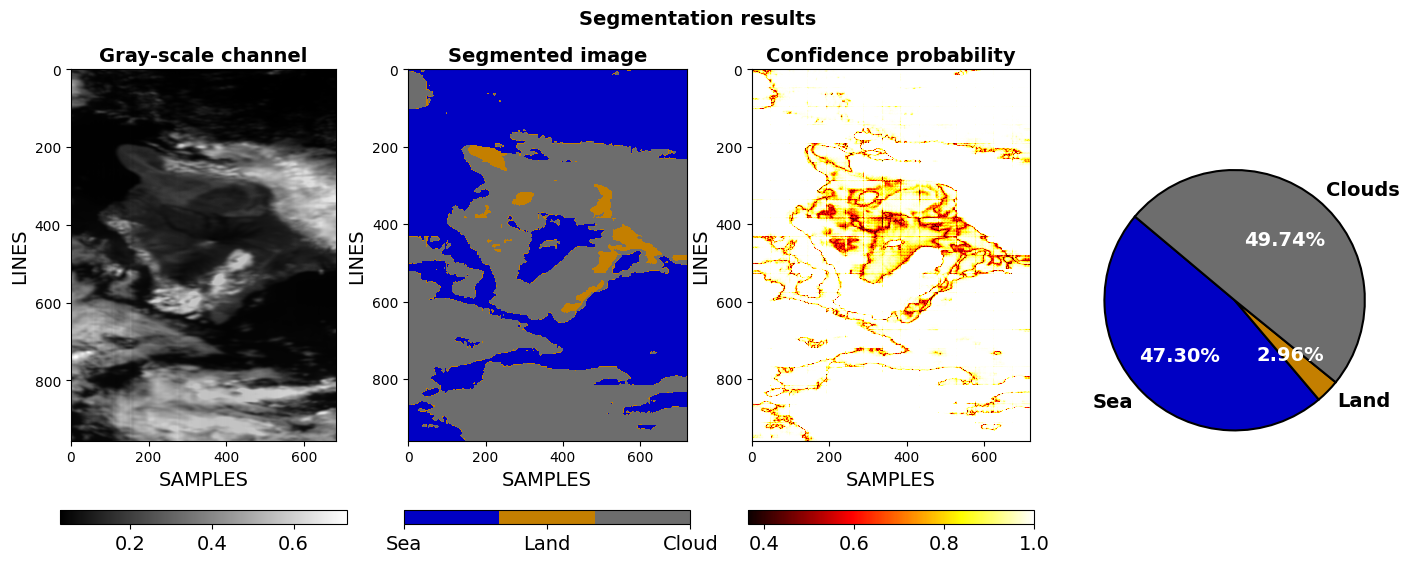

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/55-20221209_CaptureDL_bohai_2022_12_07T03_02_01-radiance.npy


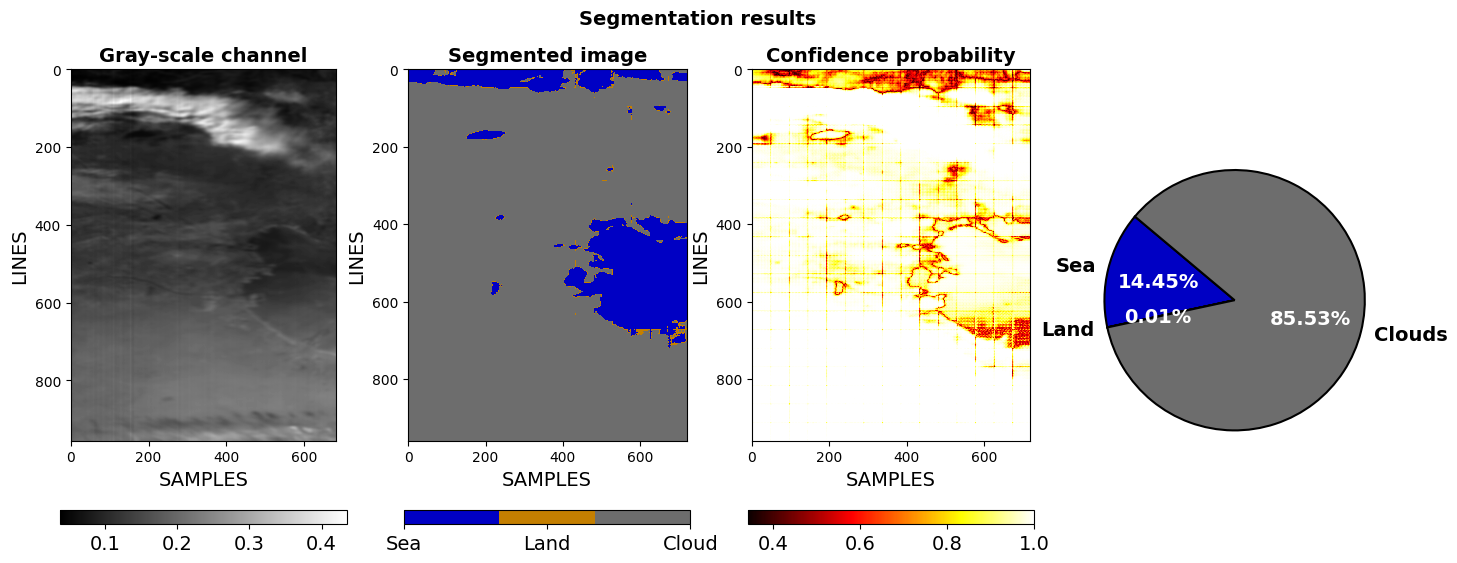

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/66-20221203_CaptureDL_falklands_2022_12_02T12_27_05-radiance.npy


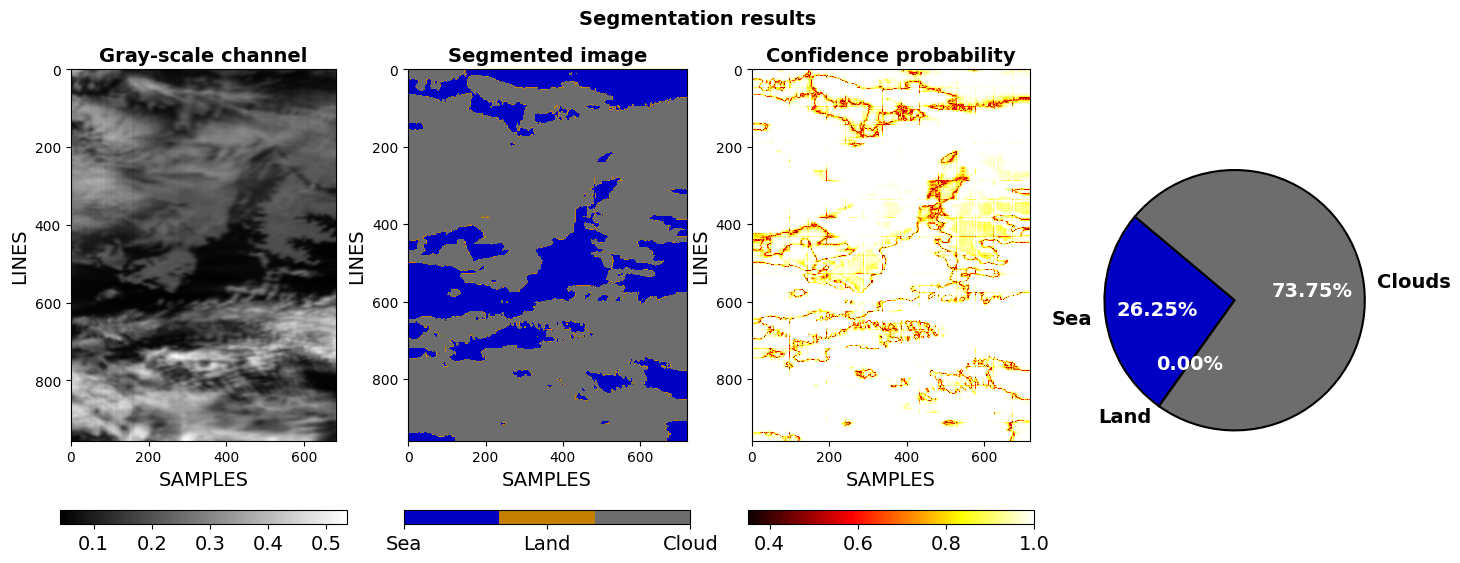

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/75-20221130_CaptureDL_vancouver_2022_11_27T19_22_56-radiance.npy


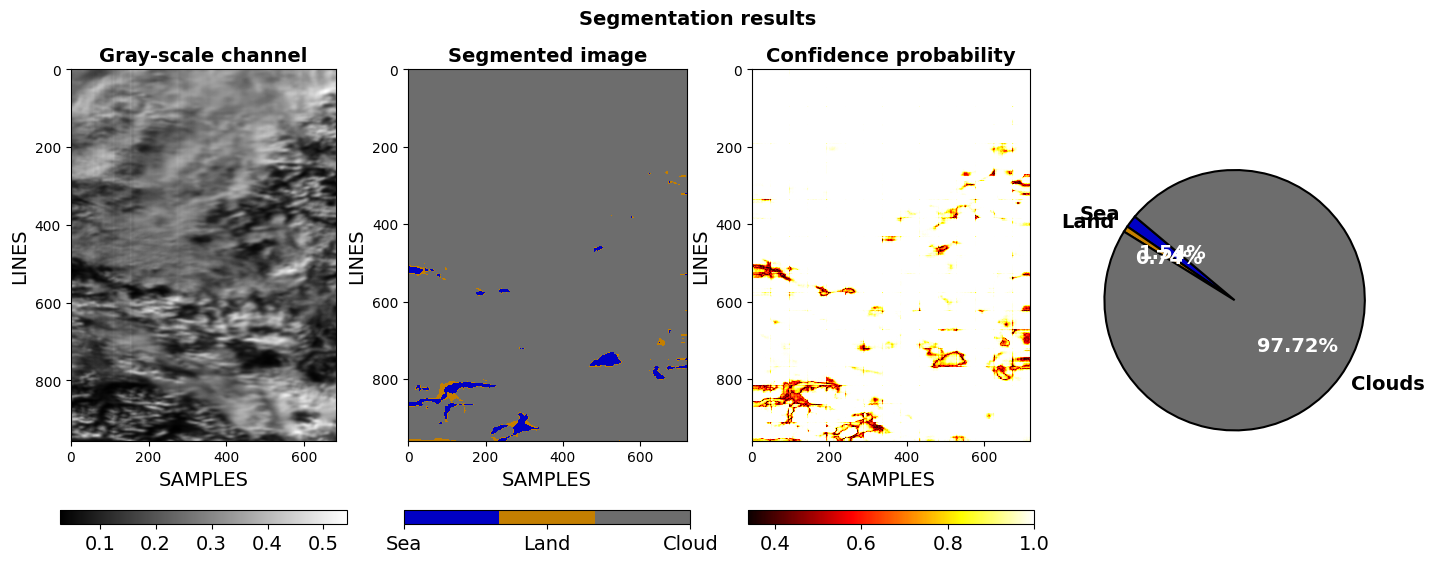

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/78-20221130_CaptureDL_florida_2022_11_25T15_10_03-radiance.npy


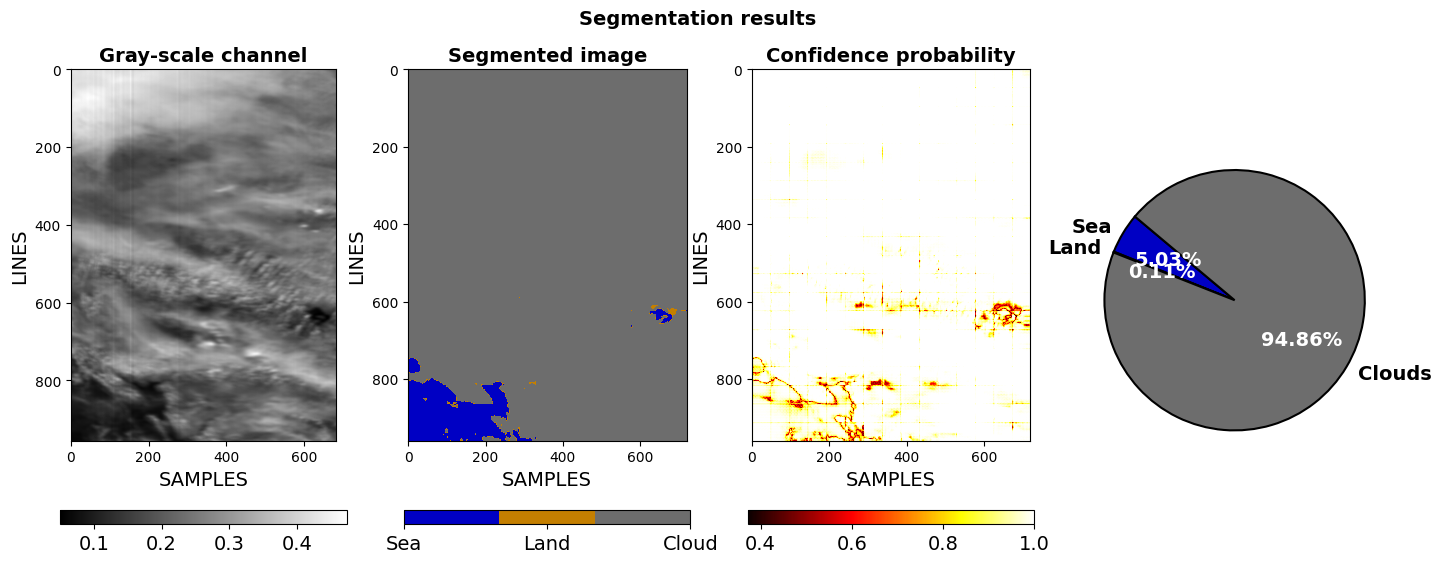

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/87-20221126_CaptureDL_tenerife_2022_11_21T11_15_03-radiance.npy


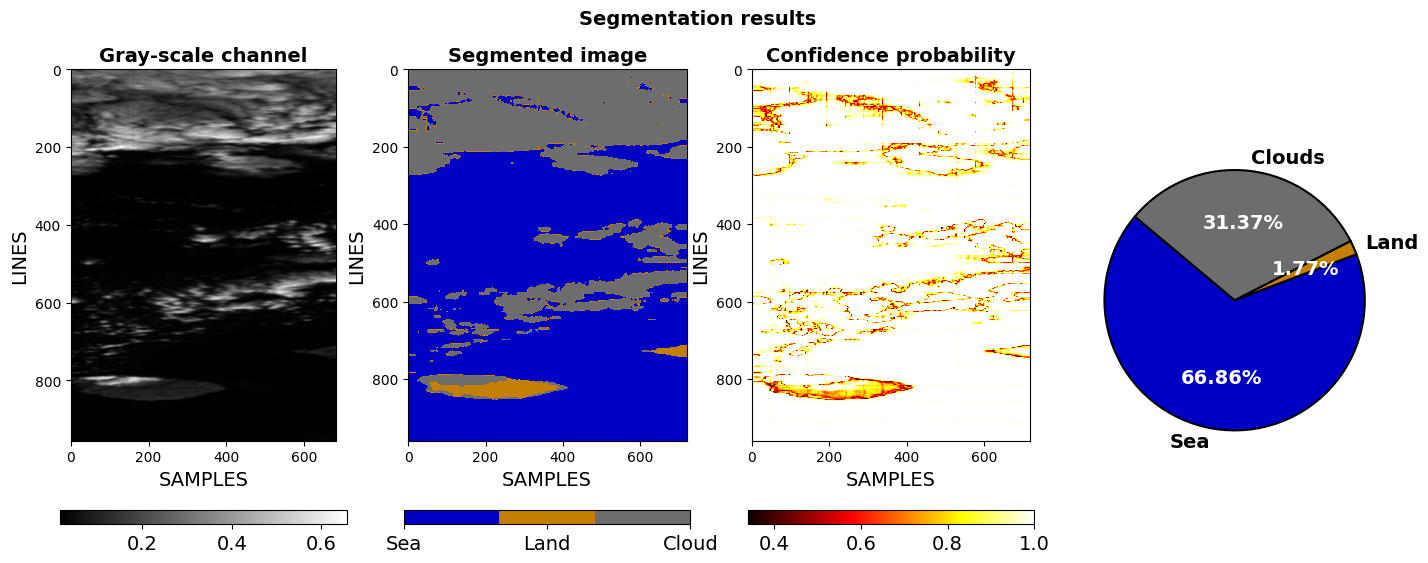

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/88-20221126_CaptureDL_qatar_2022_11_20T06_42_58-radiance.npy


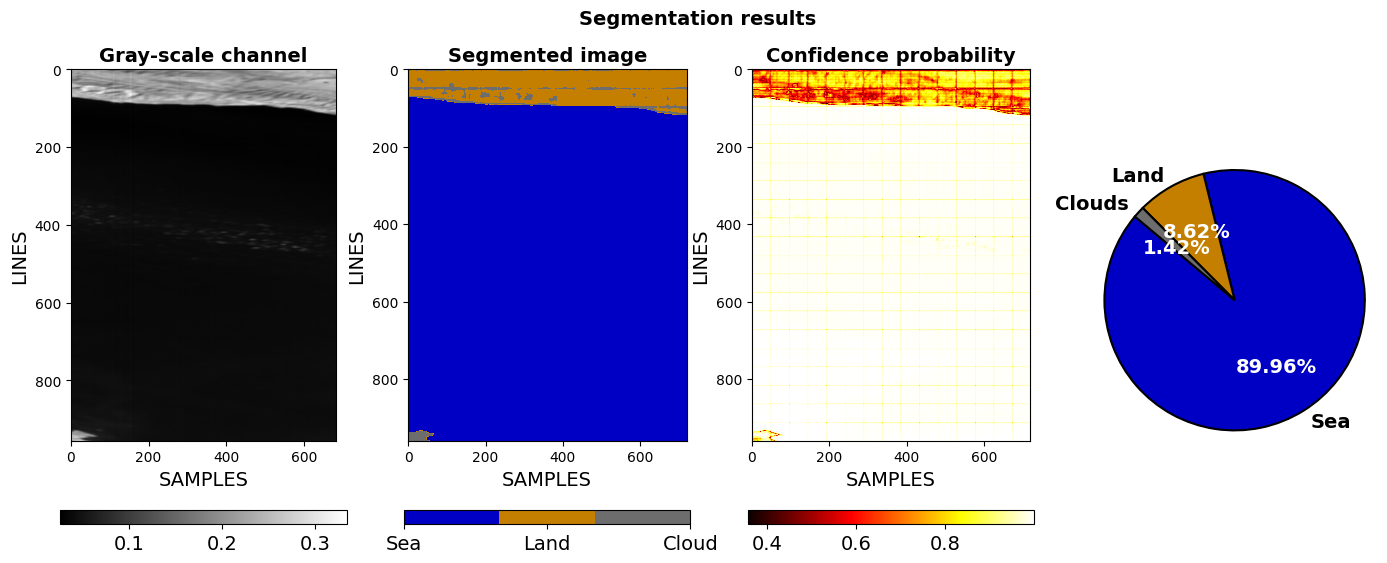

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/91-20221126_CaptureDL_jiaozhouBayBridge_2022_11_20T01_54_58-radiance.npy


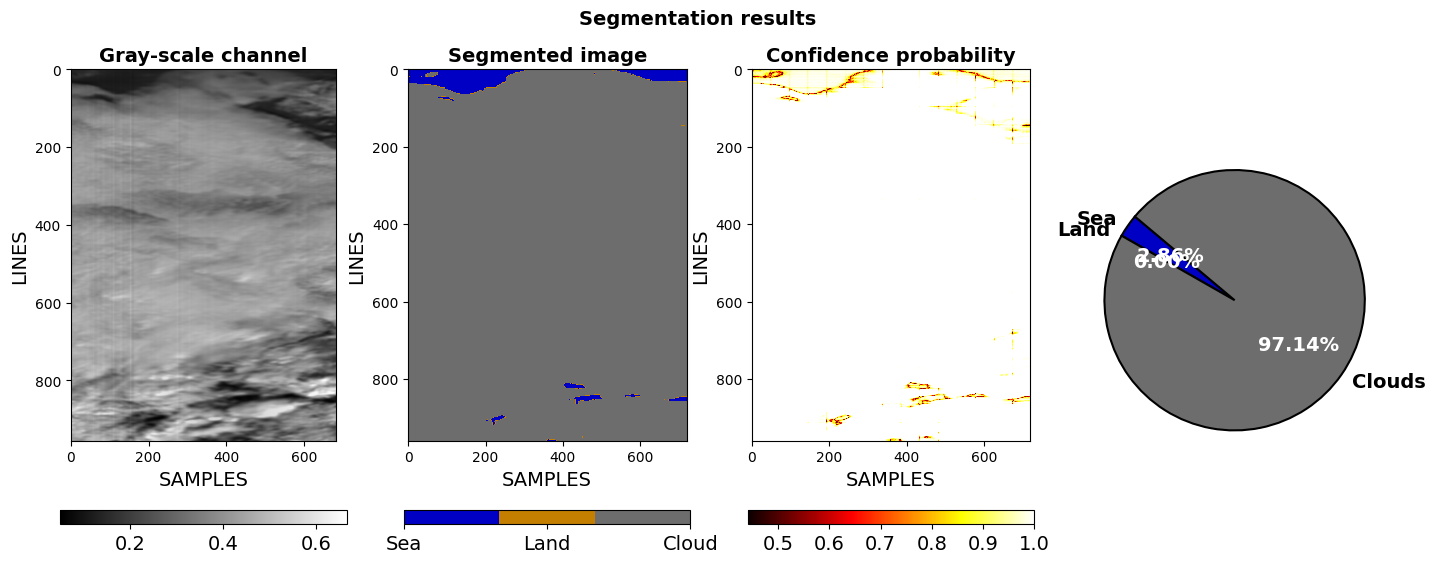

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/92-20221126_CaptureDL_trondheim_2022_11_19T09_56_00-radiance.npy


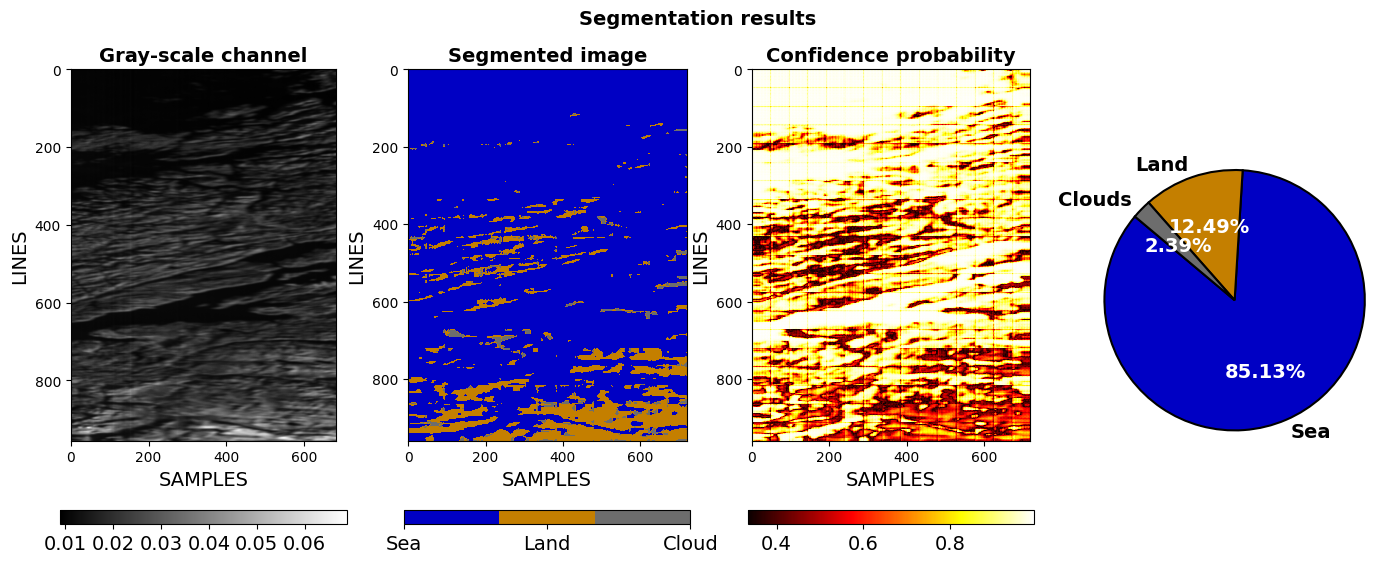

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/117-20221023_CaptureDL_gulfOfAqaba_07_49_08-radiance.npy


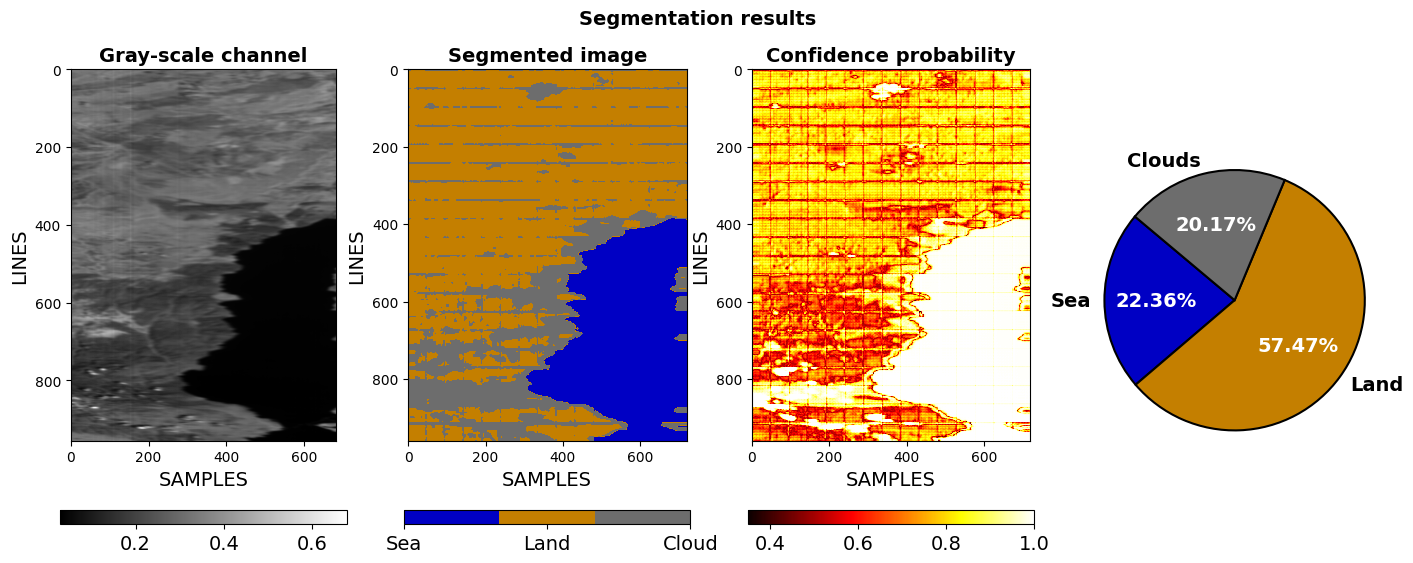

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/122-20221020_CaptureDL_gobabeb_2022_10_20T08_39_51-radiance.npy


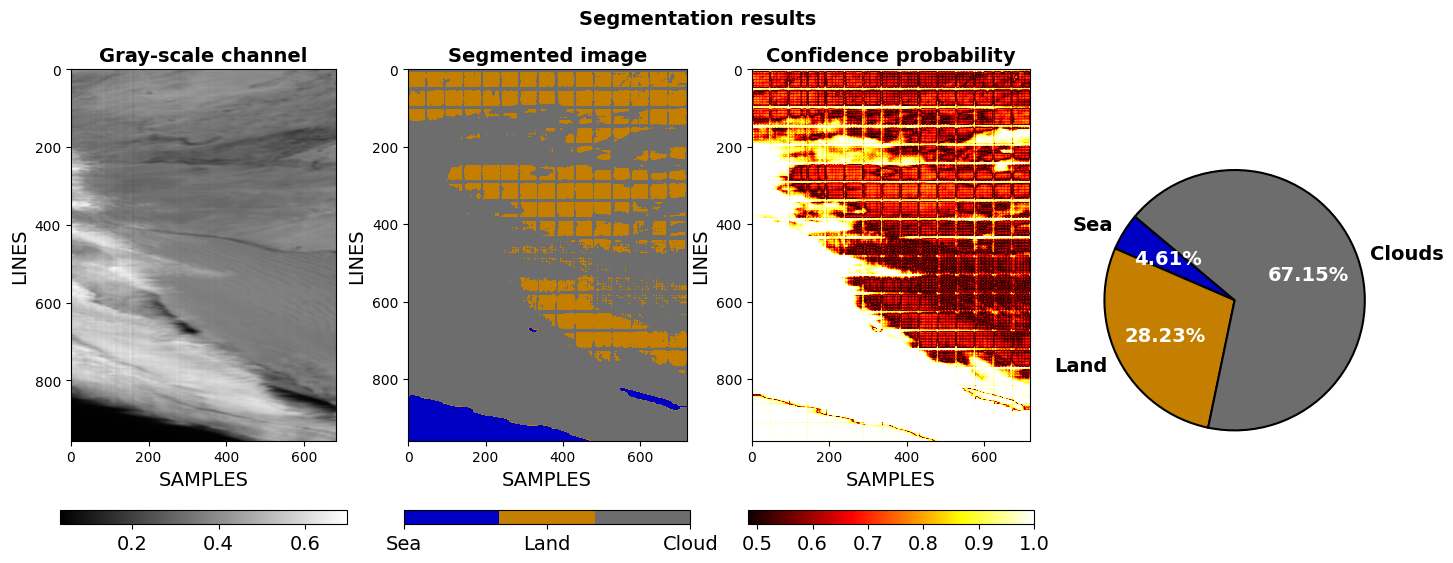

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/135-20221010_CaptureDL_patra_2022_10_10T08_51_44-radiance.npy


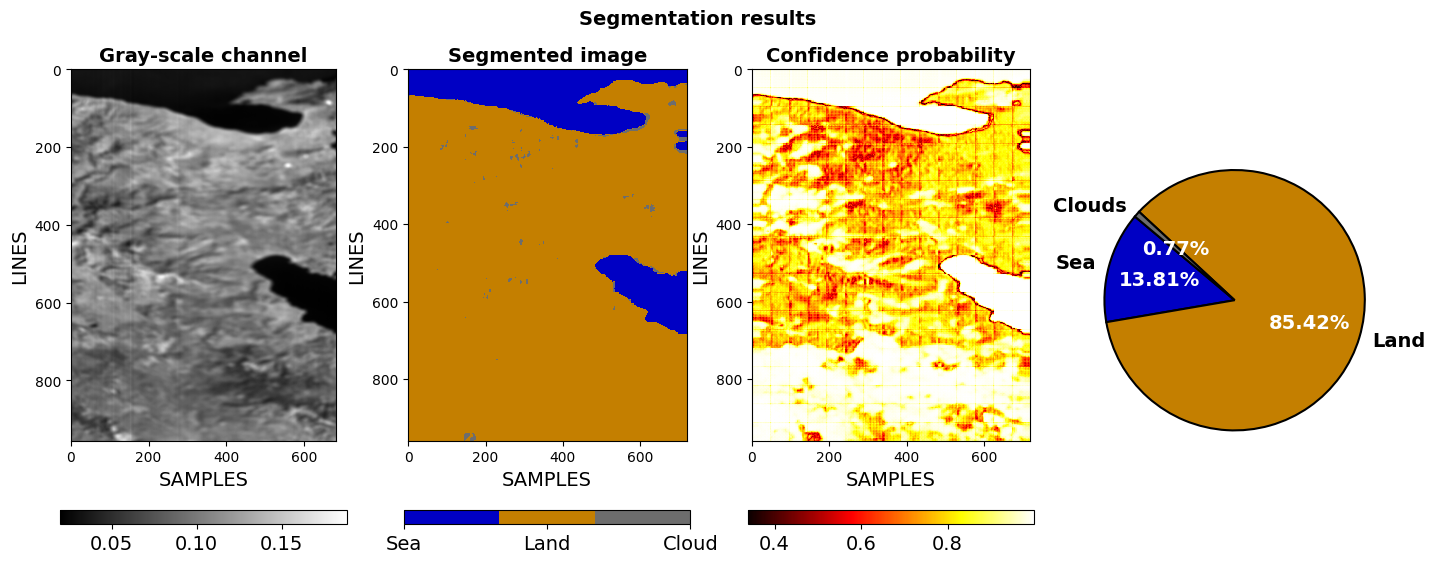

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/138-20221010_CaptureDL_tampa_target_l_2022_10_07T15_51_50-radiance.npy


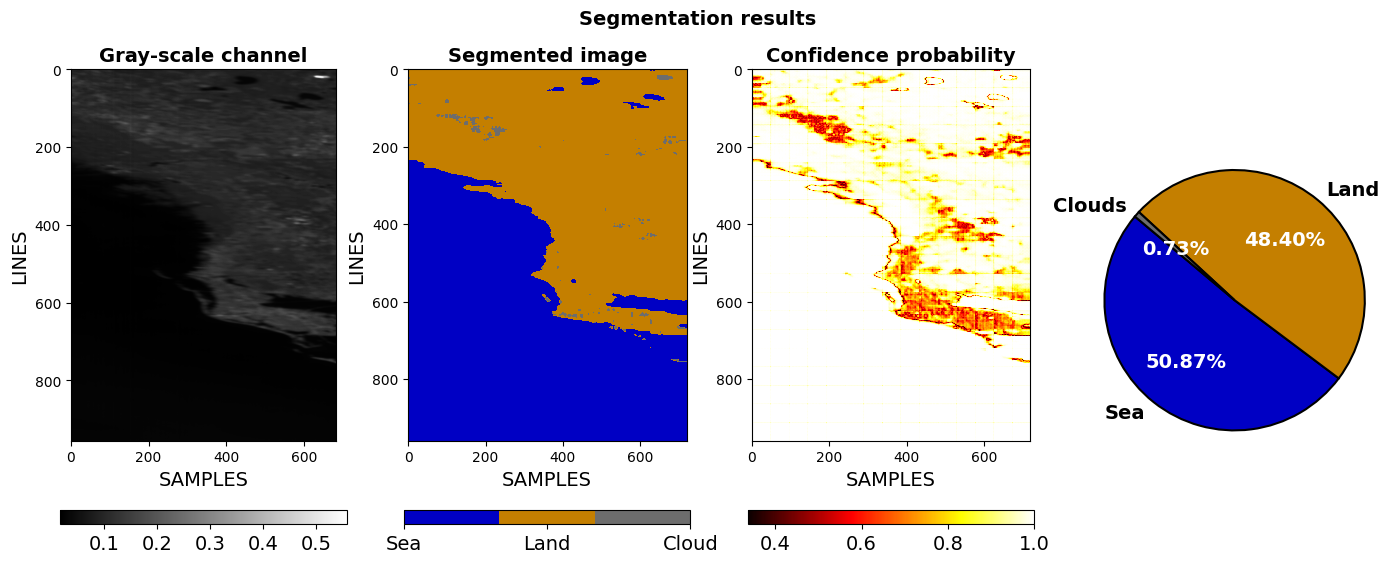

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/144-20220928_CaptureDL_00_belem_2022_09_28T13_03_32-radiance.npy


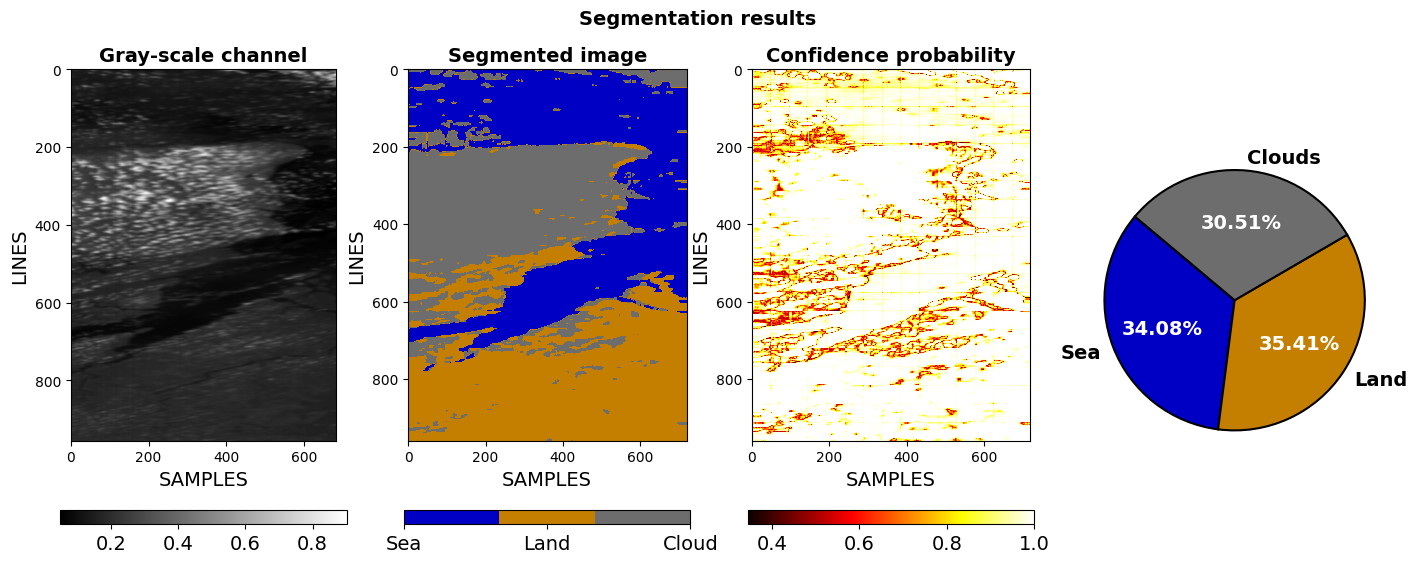

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/145-20220927_CaptureDL_00_finnmark_71.1958_26.1931_2022_09_27T09_45_45-radiance.npy


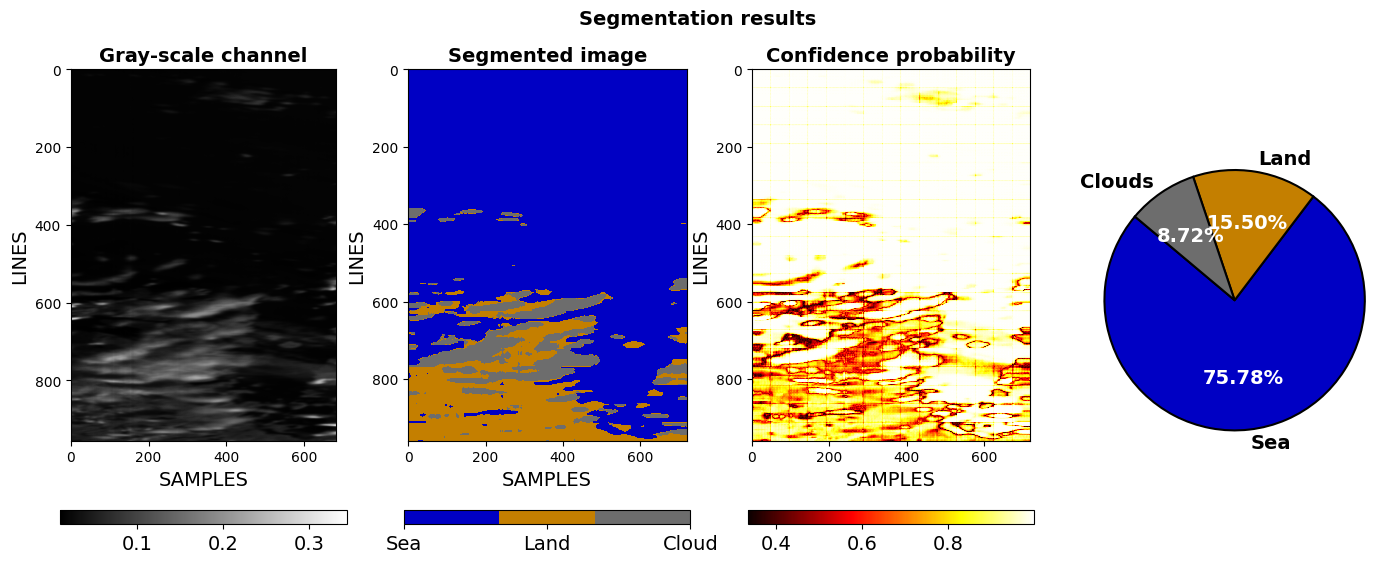

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/147-20220925_CaptureDL_00_santarem_2022_09_25T13_40_04-radiance.npy


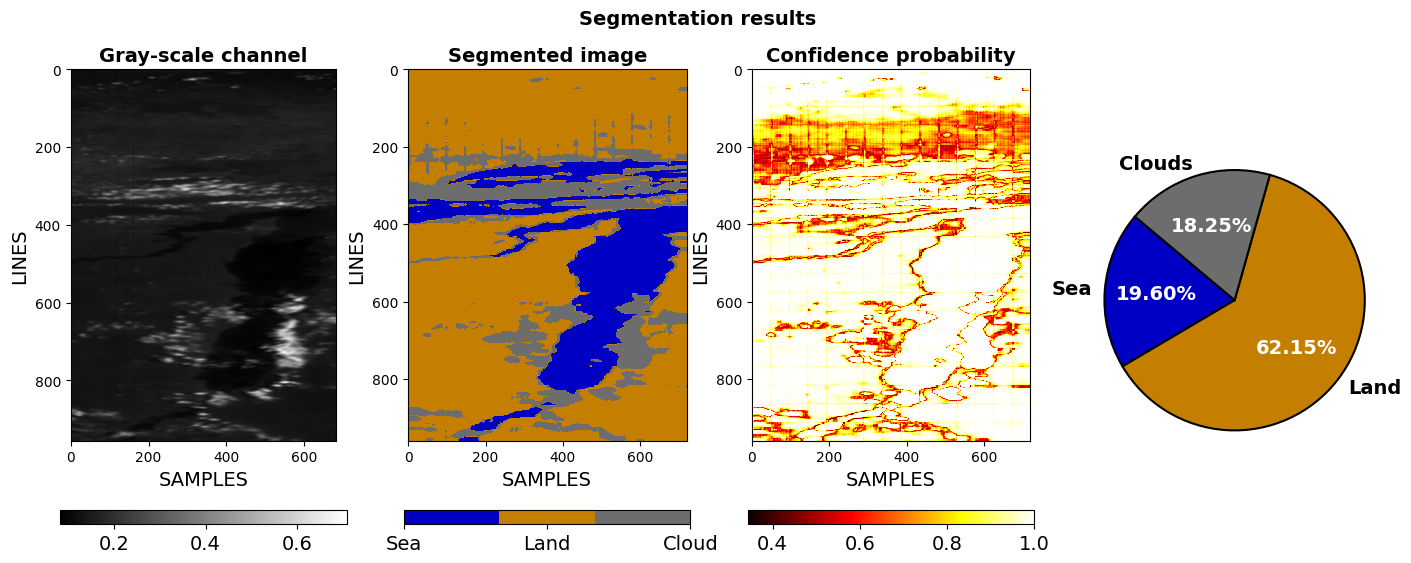

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/149-20220923_CaptureDL_00_lisbon_2022_09_23T10_43_19-radiance.npy


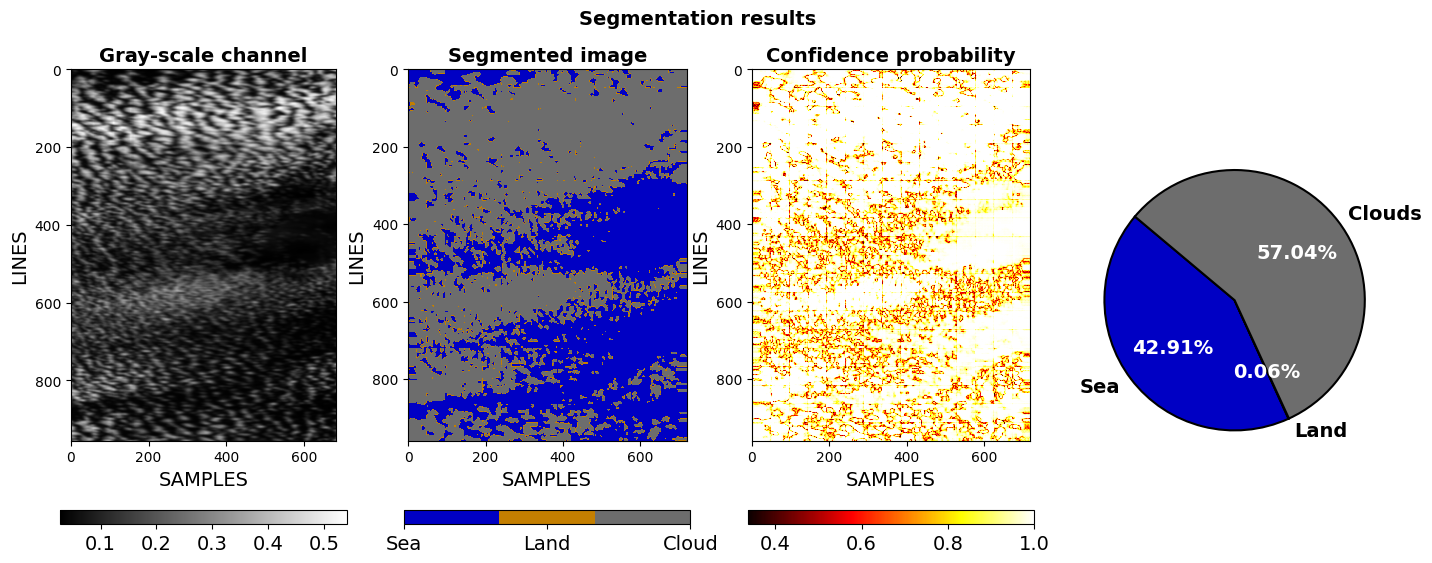

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/176-20220908_CaptureDL_00_fagradalsfjall_2022_09_08T12_01_47-radiance.npy


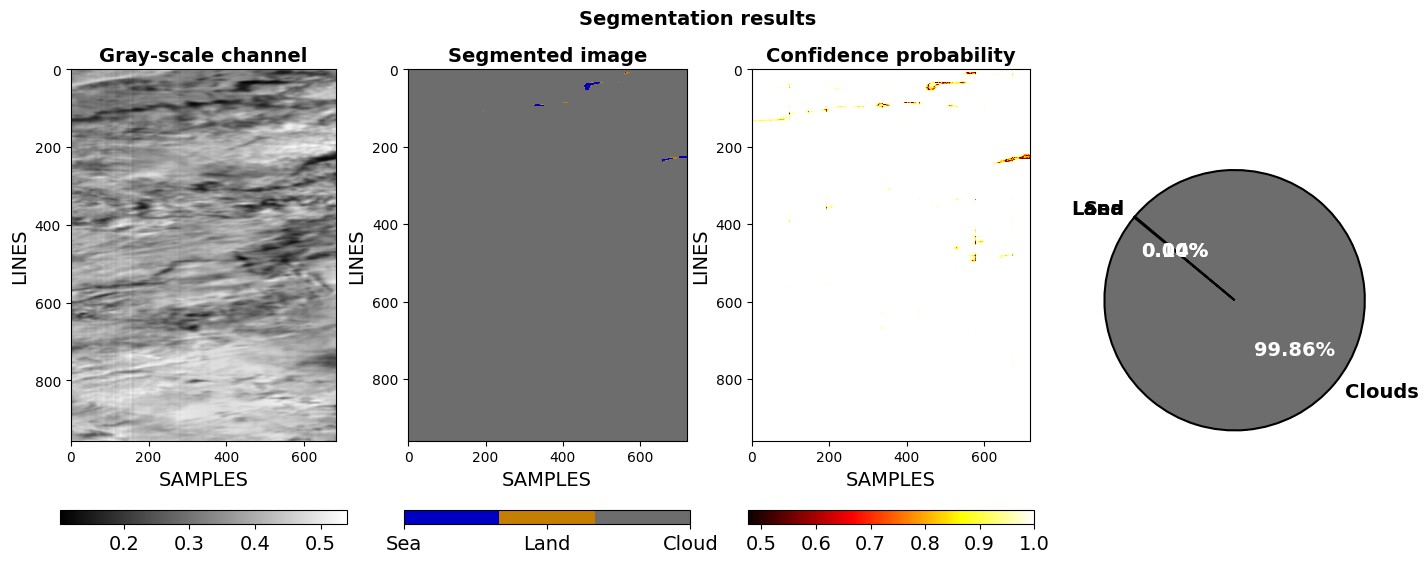

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/181-20220905_CaptureDL_00_eerie_t_r_2022_09_05T15_53_52-radiance.npy


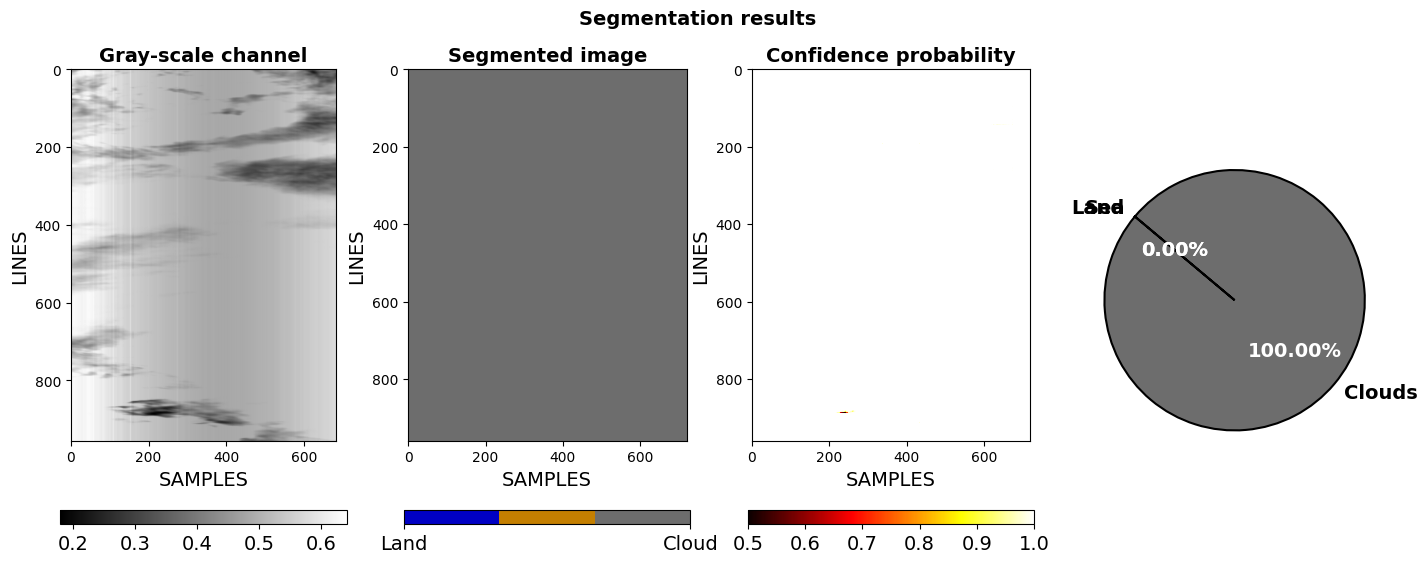

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/186-20220829_CaptureDL_00_runde_2022_08_29T10_50_39-radiance.npy


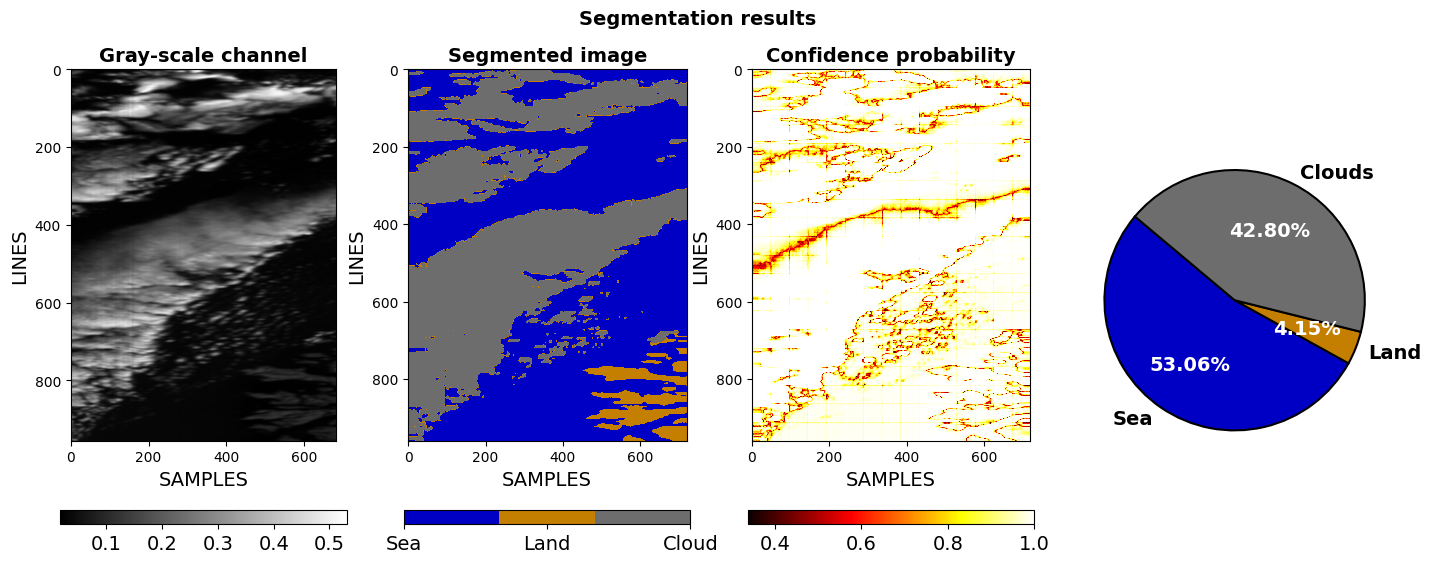

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/208-20220806_CaptureDL_00_vancouverisland_2022_08_06T18_37_57-radiance.npy


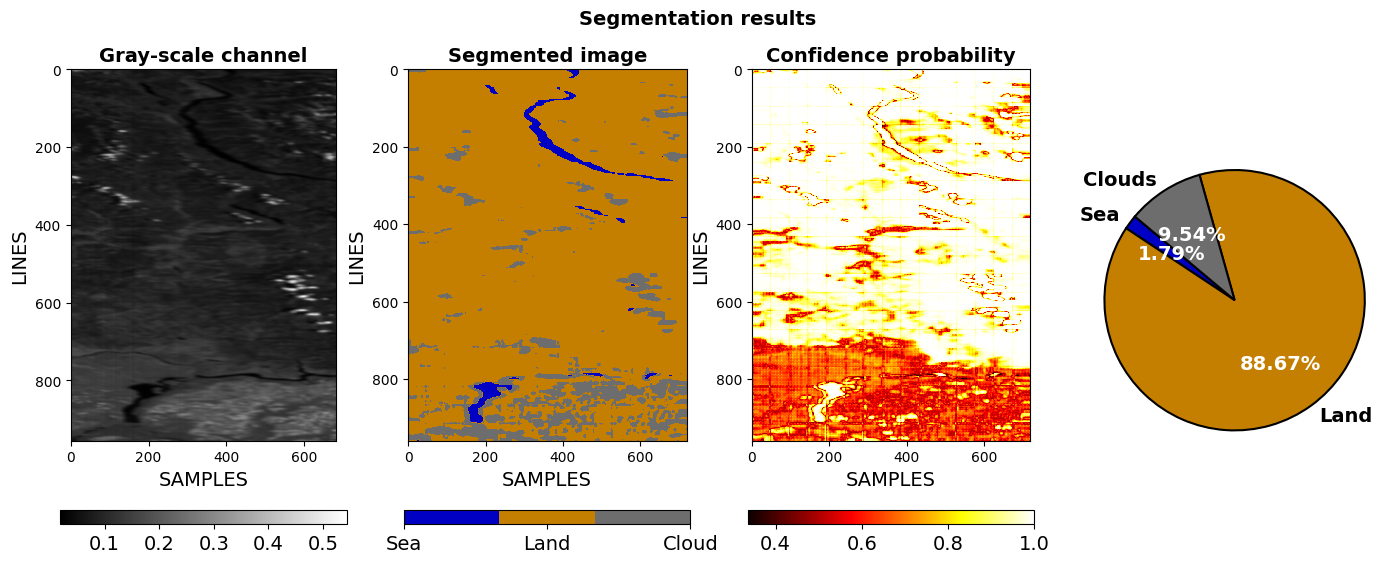

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/212-20220805_CaptureDL_00_balaton_2022_08_05T09_18_56-radiance.npy


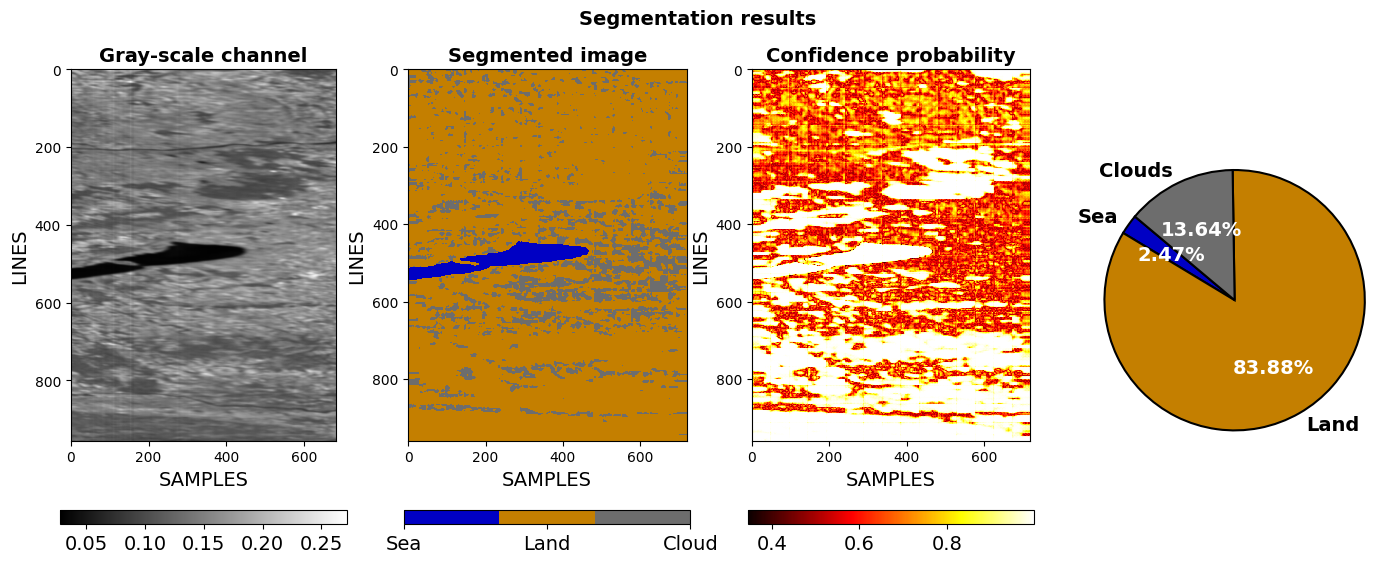

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/262-20220630_CaptureDL_00_grieg_T1929-radiance.npy


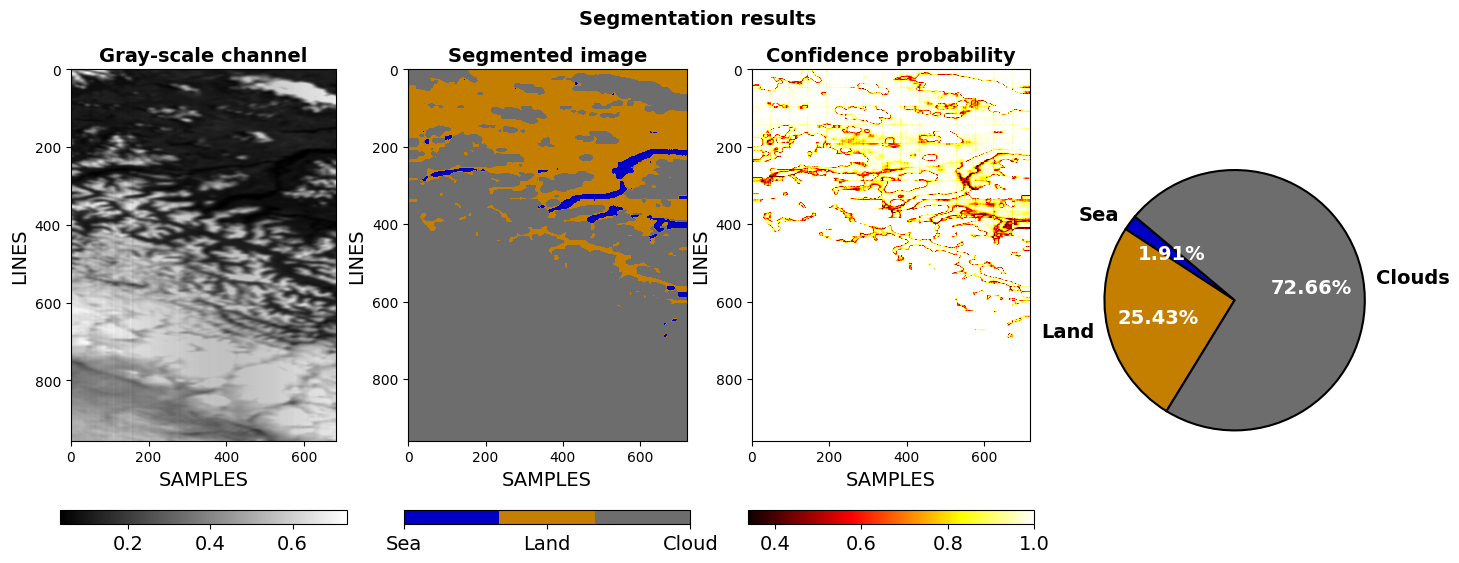

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/268-20220621_Capture_DL_00_mjosa_T10_05-radiance.npy


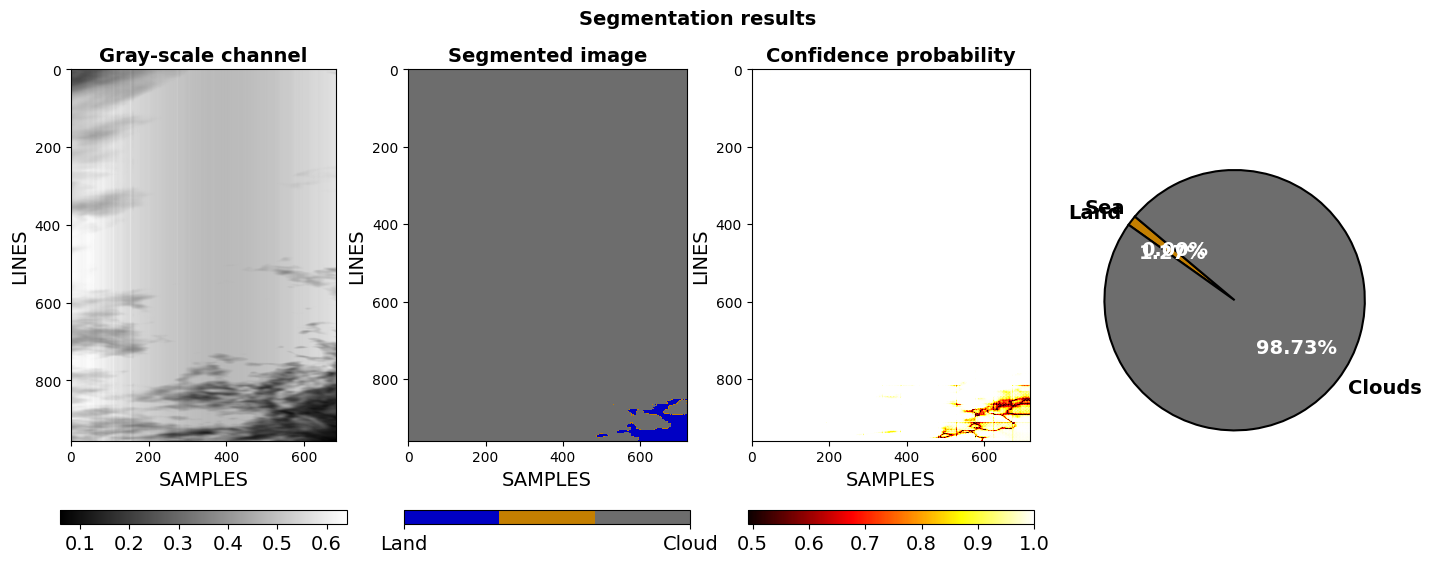

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/272-20220610_CaptureDL_00_Lofoten_10_34-radiance.npy


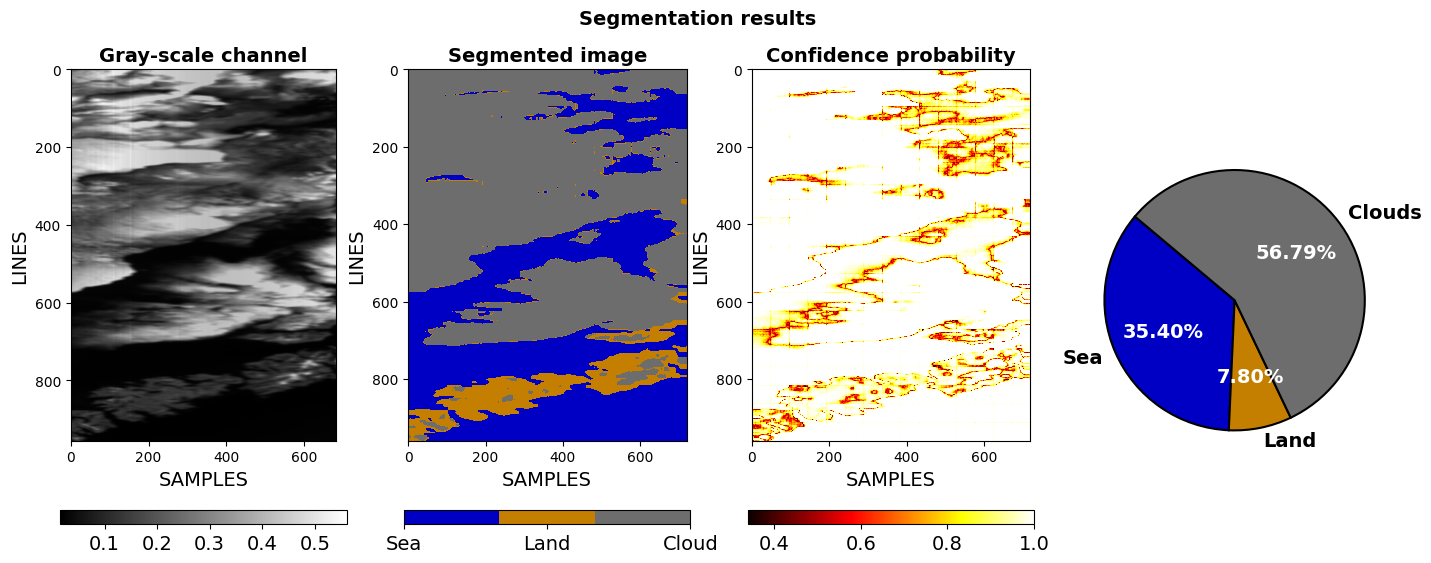

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/274-20230215_CaptureDL_yangon_2023-02-15_0330Z-radiance.npy


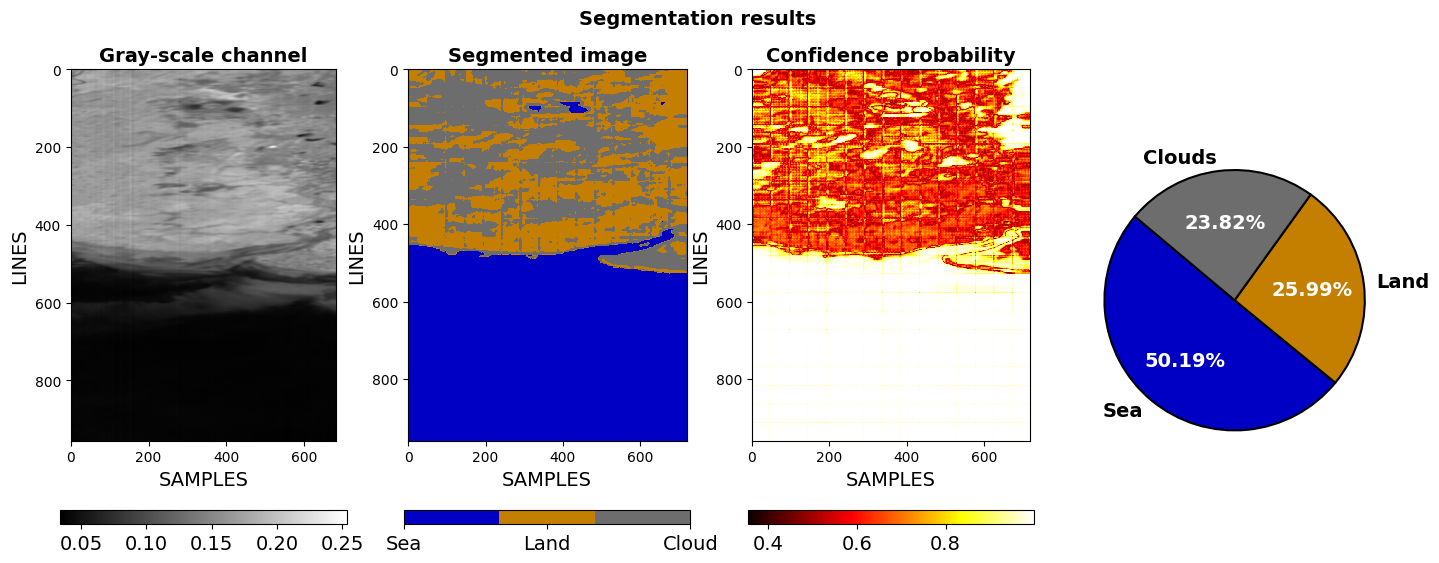

C:/Users/JONAJUSTO/Desktop/HSI_DATA/FOR_INFERENCE_MODELS/275-20230313_CaptureDL_chapala_2023-02-19_1649Z_2-radiance.npy


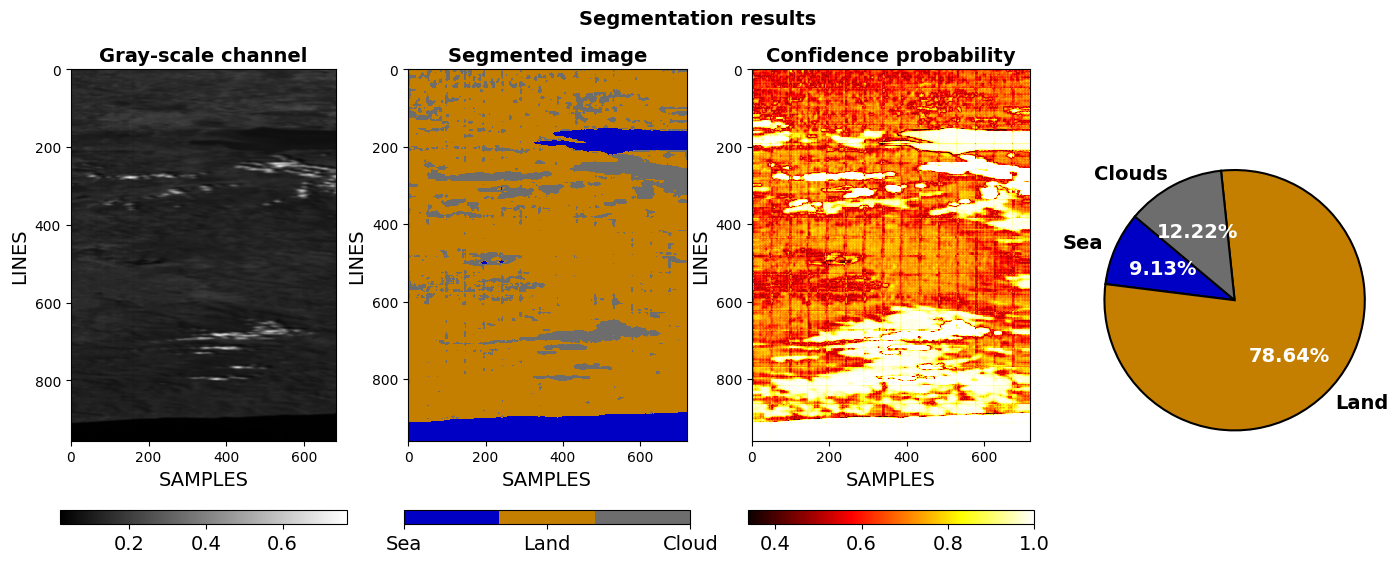

In [ ]:
for iterator_segmented_image in range(NUMBER_OF_IMAGES_IN_DEPLOYMENT_SET):
    print(PATHS_TO_DATA[iterator_segmented_image])

    # Visualise next the results from the segmentation model
    VISUALISE_SEGMENTATION_RESULTS(IMAGE=iterator_segmented_image,\
                                   FONTSIZE=14,\
                                   FIGURE_TITLE='Segmentation results',\
                                   FIGSIZE=(17, 6),\
                                   CHANNEL=89,\
                                   DATA=DATA,\
                                   SEGMENTED_IMAGE=PREDICTED_CATEGORICAL_CLASS[iterator_segmented_image, :, :],\
                                   CONFIDENCE_PROBABILITY_SPATIAL_DOMAIN=PREDICTED_PROBABILITY[iterator_segmented_image, :, :],\
                                   LINES=PREDICTED_CATEGORICAL_CLASS.shape[1],\
                                   SAMPLES=PREDICTED_CATEGORICAL_CLASS.shape[2])
                            # CHANNEL is to select one channel for visualisation and comparison purposes for the figures

